In [107]:
import gzip         # for reading .pkl.gz
import pickle       # to load the pickled dicts
import numpy as np  # for arrays, math
import matplotlib.pyplot as plt  # for plotting
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap
from scipy.signal import find_peaks, peak_prominences, peak_widths
from scipy.optimize import curve_fit


In [108]:
def mesh_index_to_km(x):
    return (x / 299) * 110

def km_to_mesh_index(x):
    return (x / 110) * 299

# FLUVIAL EROSION TESTS

Grounding Line plotting - Fluvial Erosion = 5.0 e-12

In [109]:
gl_run_title_cc_5e12 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 5.0 E^-12")
cc_5e12 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cc_tests/DATA_Dictionary_2025_04_29__22_10_35_CC5e-12.pkl.gz"
with gzip.open(cc_5e12, 'rb') as f:
    DATA_dict_cc_5e12 = pickle.load(f)

In [110]:
bed_dict5e12 = DATA_dict_cc_5e12['bed_dict']
base_dict = DATA_dict_cc_5e12['base_dict']
surf_dict= DATA_dict_cc_5e12 ['surf_dict']
sed_dict = DATA_dict_cc_5e12['sed_dict']
H_dict = DATA_dict_cc_5e12['H_dict']
us_dict_5e12 = DATA_dict_cc_5e12['us_dict']
ub_dict = DATA_dict_cc_5e12['ub_dict']
Hs_dict = DATA_dict_cc_5e12['Hs_dict']
GL_dict = DATA_dict_cc_5e12['GL_dict']
Qs_dict = DATA_dict_cc_5e12['Qs_dict']
counter_dict_5e12 = DATA_dict_cc_5e12['counter_dict']
SMB_dict_5e12 = DATA_dict_cc_5e12['SMB_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20002.625725829785


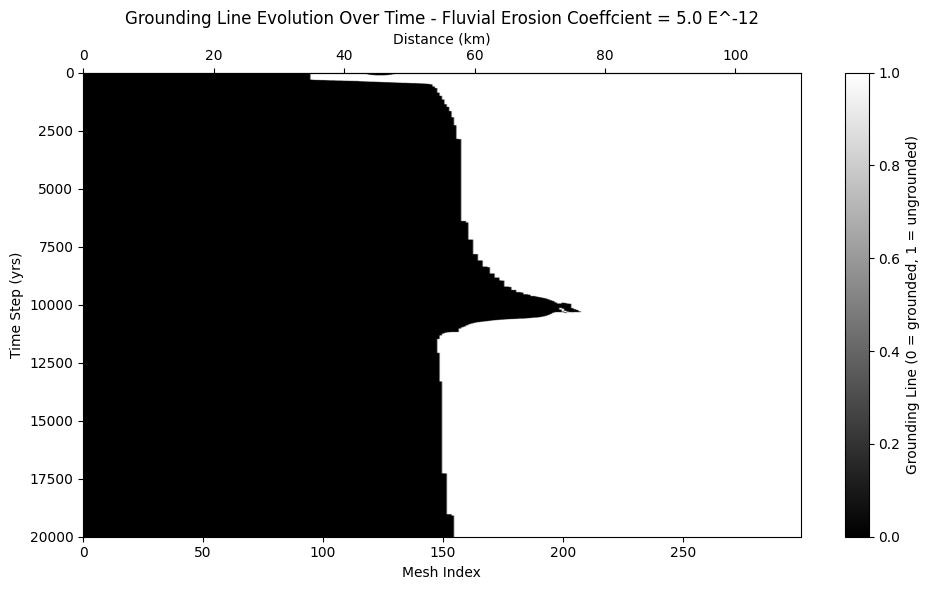

In [111]:
GL_dict = DATA_dict_cc_5e12['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_5e12)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [112]:
gl_positions_cc_5e12 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_5e12.append(idx)

gl_positions_cc_5e12 = np.array(gl_positions_cc_5e12)
GL_km_cc_5e12 = mesh_index_to_km(gl_positions_cc_5e12)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cc_5e12 = GL_km_cc_5e12[mask]

/home/kayatroyer/anaconda3/envs/thesis_analysis/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/kayatroyer/anaconda3/envs/thesis_analysis/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


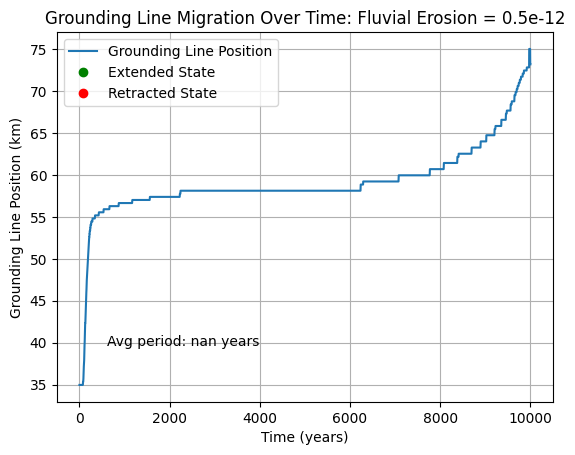

Mean cycle period: nan years
[]
Mean advance amplitude: nan km
[]
Mean retreat amplitude: nan km
[]


In [113]:
peaks_cc_5e12, _ = find_peaks(GL_km_cc_5e12, prominence=2) 
troughs_cc_5e12, _ = find_peaks(-GL_km_cc_5e12, prominence=2)     
periods_cc_5e12 = np.diff(np.array(time)[troughs_cc_5e12])
adv_dists_cc_5e12 = GL_km_cc_5e12[peaks_cc_5e12]
ret_dists__cc_5e12 = GL_km_cc_5e12[troughs_cc_5e12]


plt.plot(time, GL_km_cc_5e12, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_5e12], GL_km_cc_5e12[peaks_cc_5e12], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_5e12], GL_km_cc_5e12[troughs_cc_5e12], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_5e12):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 0.5e-12")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_5e12):.2f} years")
print(periods_cc_5e12)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_5e12):.2f} km")
print(adv_dists_cc_5e12)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_5e12):.2f} km")
print(ret_dists__cc_5e12)


163.66813970120486


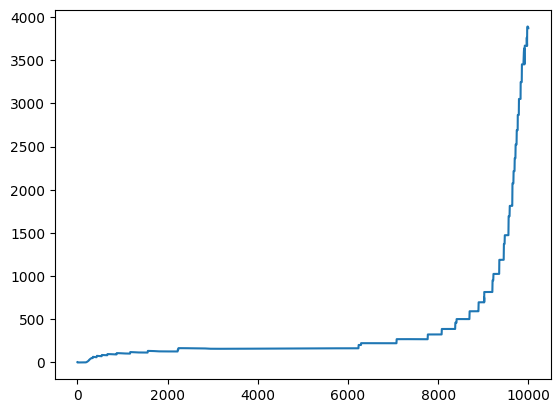

In [114]:
max_Qs_5e12 = np.array([max(values) for values in Qs_dict.values()])
time_5e12 = np.array(list(Qs_dict.keys()))

mask = time_5e12 <= 10000

time_5e12 = time_5e12[mask]
max_Qs_5e12 = max_Qs_5e12[mask]
plt.plot(time_5e12, max_Qs_5e12)
MAX_5e12 = np.max(max_Qs_5e12)

MAX_5e12 = np.median(max_Qs_5e12)
print(MAX_5e12)

Grounding Line plotting - Fluvial Erosion = 1.0 e-11


In [115]:
gl_run_title_cc_1e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 1.0 E^-11")
cc_1e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cc_tests/DATA_Dictionary_2025_04_29__23_11_34_CC1e-11.pkl.gz"
with gzip.open(cc_1e11, 'rb') as f:
    DATA_dict_cc_1e11 = pickle.load(f)

In [116]:
bed_dict1e11 = DATA_dict_cc_1e11['bed_dict']
base_dict = DATA_dict_cc_1e11['base_dict']
surf_dict= DATA_dict_cc_1e11 ['surf_dict']
sed_dict = DATA_dict_cc_1e11['sed_dict']
H_dict = DATA_dict_cc_1e11['H_dict']
us_dict_1e11 = DATA_dict_cc_1e11['us_dict']
ub_dict = DATA_dict_cc_1e11['ub_dict']
Hs_dict = DATA_dict_cc_1e11['Hs_dict']
GL_dict = DATA_dict_cc_1e11['GL_dict']
Qs_dict = DATA_dict_cc_1e11['Qs_dict']
counter_dict_1e11 = DATA_dict_cc_1e11['counter_dict']
SMB_dict_1e11 = DATA_dict_cc_1e11['SMB_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20002.611411947586


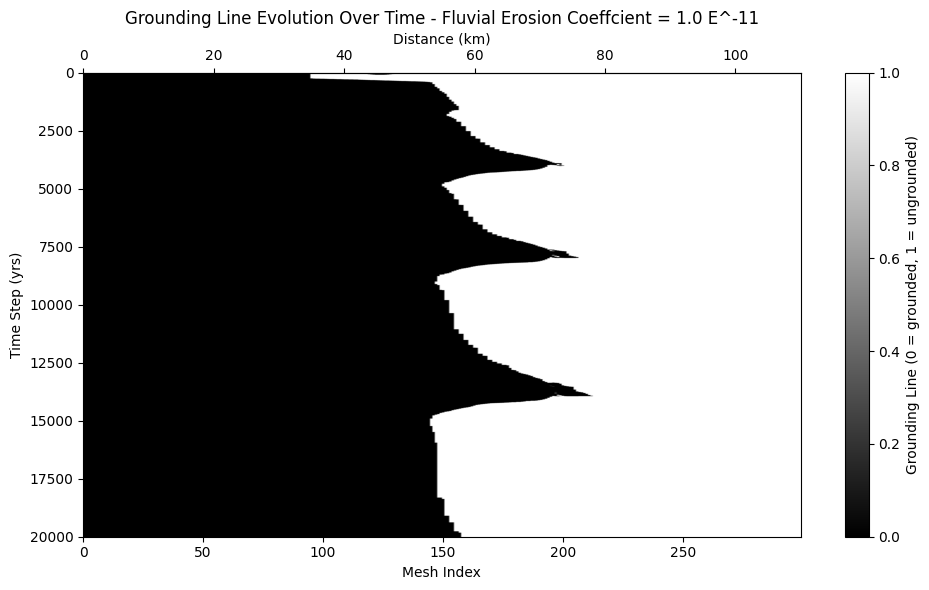

In [117]:
GL_dict = DATA_dict_cc_1e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_1e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [118]:
gl_positions_cc_1e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_1e11.append(idx)

gl_positions_cc_1e11 = np.array(gl_positions_cc_1e11)
GL_km_cc_1e11 = mesh_index_to_km(gl_positions_cc_1e11)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cc_1e11 = GL_km_cc_1e11[mask]

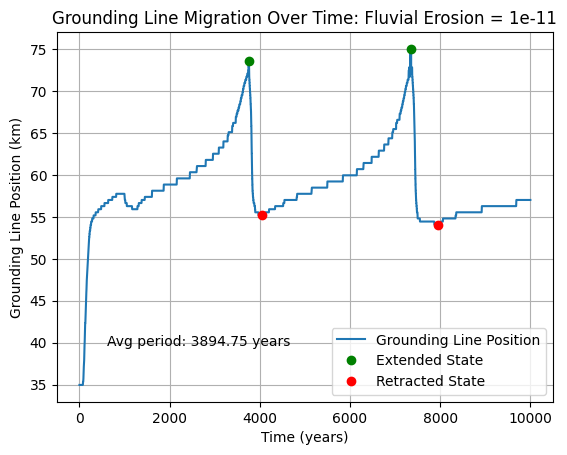

Mean cycle period: 3894.75 years
[3894.74889392]
Mean advance amplitude: 74.31 km
[73.57859532 75.05016722]
Mean retreat amplitude: 54.63 km
[55.18394649 54.08026756]


In [119]:
peaks_cc_1e11, _ = find_peaks(GL_km_cc_1e11, prominence=5, distance = 50) 
troughs_cc_1e11, _ = find_peaks(-GL_km_cc_1e11, prominence=2, distance = 500)     
periods_cc_1e11 = np.diff(np.array(time)[troughs_cc_1e11])
adv_dists_cc_1e11 = GL_km_cc_1e11[peaks_cc_1e11]
ret_dists__cc_1e11 = GL_km_cc_1e11[troughs_cc_1e11]


plt.plot(time, GL_km_cc_1e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_1e11], GL_km_cc_1e11[peaks_cc_1e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_1e11], GL_km_cc_1e11[troughs_cc_1e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_1e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 1e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_1e11):.2f} years")
print(periods_cc_1e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_1e11):.2f} km")
print(adv_dists_cc_1e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_1e11):.2f} km")
print(ret_dists__cc_1e11)


243.16191385871127


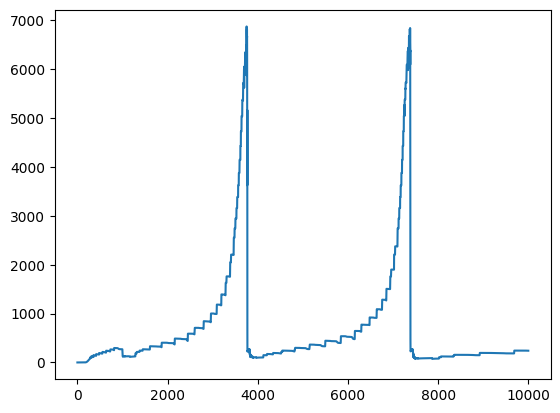

In [120]:
max_Qs_1e11 = np.array([max(values) for values in Qs_dict.values()])
time_1e11 = np.array(list(Qs_dict.keys()))

mask = time_1e11 <= 10000

time_1e11 = time_1e11[mask]
max_Qs_1e11 = max_Qs_1e11[mask]
plt.plot(time_1e11, max_Qs_1e11)
MAX_1e11 = np.max(max_Qs_1e11)

MAX_1e11 = np.median(max_Qs_1e11)
print(MAX_1e11)

Grounding Line plotting - Fluvial Erosion = 1.5 e-11


In [121]:
gl_run_title_cc_15e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 1.5E^-11")
cc_15e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cc_tests/DATA_Dictionary_2025_04_30__00_28_01_CC15e-11.pkl.gz"
with gzip.open(cc_15e11, 'rb') as f:
    DATA_dict_cc_15e11 = pickle.load(f)

In [122]:
bed_dict15e11 = DATA_dict_cc_15e11['bed_dict']
base_dict = DATA_dict_cc_15e11['base_dict']
surf_dict= DATA_dict_cc_15e11 ['surf_dict']
sed_dict = DATA_dict_cc_15e11['sed_dict']
H_dict = DATA_dict_cc_15e11['H_dict']
us_dict_15e11 = DATA_dict_cc_15e11['us_dict']
ub_dict = DATA_dict_cc_15e11['ub_dict']
Hs_dict = DATA_dict_cc_15e11['Hs_dict']
GL_dict = DATA_dict_cc_15e11['GL_dict']
Qs_dict = DATA_dict_cc_15e11['Qs_dict']
counter_dict_15e11 = DATA_dict_cc_15e11['counter_dict']
SMB_dict_15e11 = DATA_dict_cc_15e11['SMB_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20000.148649883886


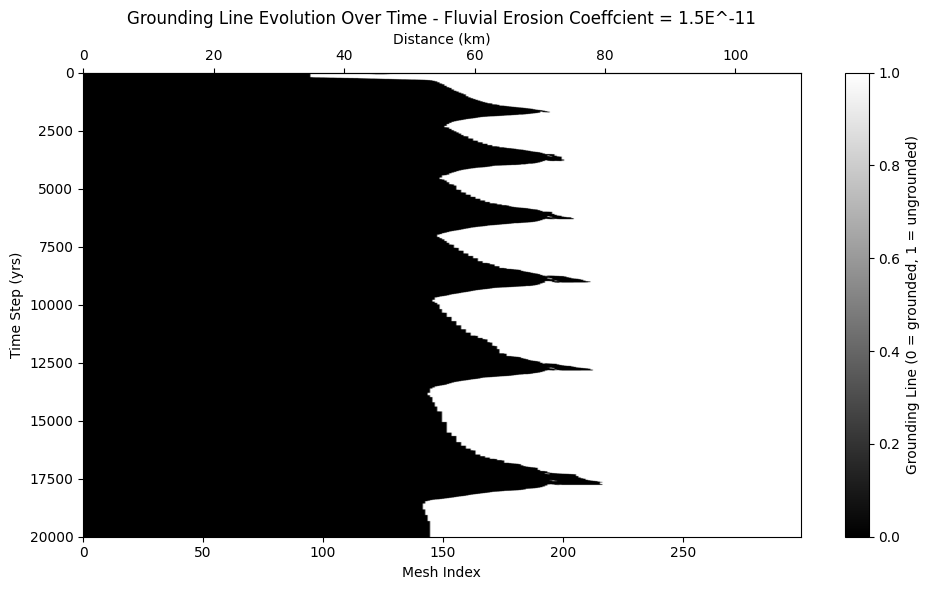

In [123]:
GL_dict = DATA_dict_cc_15e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_15e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [124]:
gl_positions_cc_15e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_15e11.append(idx)

gl_positions_cc_15e11 = np.array(gl_positions_cc_15e11)
GL_km_cc_15e11 = mesh_index_to_km(gl_positions_cc_15e11)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cc_15e11 = GL_km_cc_15e11[mask]

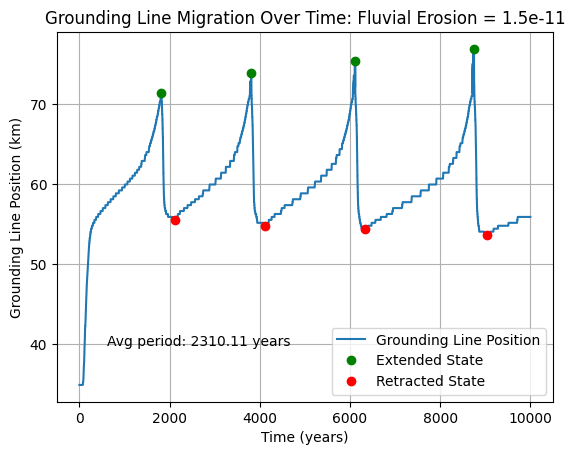

Mean cycle period: 2310.11 years
[2009.47853156 2200.5566195  2720.29001164]
Mean advance amplitude: 74.41 km
[71.37123746 73.94648829 75.4180602  76.88963211]
Mean retreat amplitude: 54.63 km
[55.55183946 54.81605351 54.44816054 53.71237458]


In [125]:
peaks_cc_15e11, _ = find_peaks(GL_km_cc_15e11, prominence=3, distance = 100) 
troughs_cc_15e11, _ = find_peaks(-GL_km_cc_15e11, prominence=2, distance = 500)     
periods_cc_15e11 = np.diff(np.array(time)[troughs_cc_15e11])
adv_dists_cc_15e11 = GL_km_cc_15e11[peaks_cc_15e11]
ret_dists__cc_15e11 = GL_km_cc_15e11[troughs_cc_15e11]


plt.plot(time, GL_km_cc_15e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_15e11], GL_km_cc_15e11[peaks_cc_15e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_15e11], GL_km_cc_15e11[troughs_cc_15e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_15e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 1.5e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_15e11):.2f} years")
print(periods_cc_15e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_15e11):.2f} km")
print(adv_dists_cc_15e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_15e11):.2f} km")
print(ret_dists__cc_15e11)


9388.362089432574


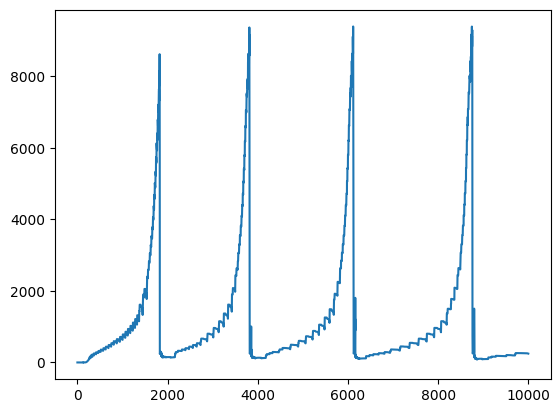

In [126]:
max_Qs_15e11 = np.array([max(values) for values in Qs_dict.values()])
time_15e11 = np.array(list(Qs_dict.keys()))

mask = time_15e11 <= 10000

time_15e11 = time_15e11[mask]
max_Qs_15e11 = max_Qs_15e11[mask]
plt.plot(time_15e11, max_Qs_15e11)
MAX_15e11 = np.max(max_Qs_15e11)

MAX_15e11 = np.max(max_Qs_15e11)
print(MAX_15e11)

Grounding Line plotting - Fluvial Erosion = 2 e-11


In [127]:
gl_run_title_cc_2e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 2E^-11")
cc_2e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cc_tests/DATA_Dictionary_2025_04_30__11_48_03_CC2e-11.pkl.gz"
with gzip.open(cc_2e11, 'rb') as f:
    DATA_dict_cc_2e11 = pickle.load(f)

In [128]:
bed_dict2e11 = DATA_dict_cc_2e11['bed_dict']
base_dict = DATA_dict_cc_2e11['base_dict']
surf_dict= DATA_dict_cc_2e11 ['surf_dict']
sed_dict = DATA_dict_cc_2e11['sed_dict']
H_dict = DATA_dict_cc_2e11['H_dict']
us_dict_2e11 = DATA_dict_cc_2e11['us_dict']
ub_dict = DATA_dict_cc_2e11['ub_dict']
Hs_dict = DATA_dict_cc_2e11['Hs_dict']
GL_dict = DATA_dict_cc_2e11['GL_dict']
Qs_dict = DATA_dict_cc_2e11['Qs_dict']
counter_dict_2e11 = DATA_dict_cc_2e11['counter_dict']
SMB_dict_2e11 = DATA_dict_cc_2e11['SMB_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20004.41453046819


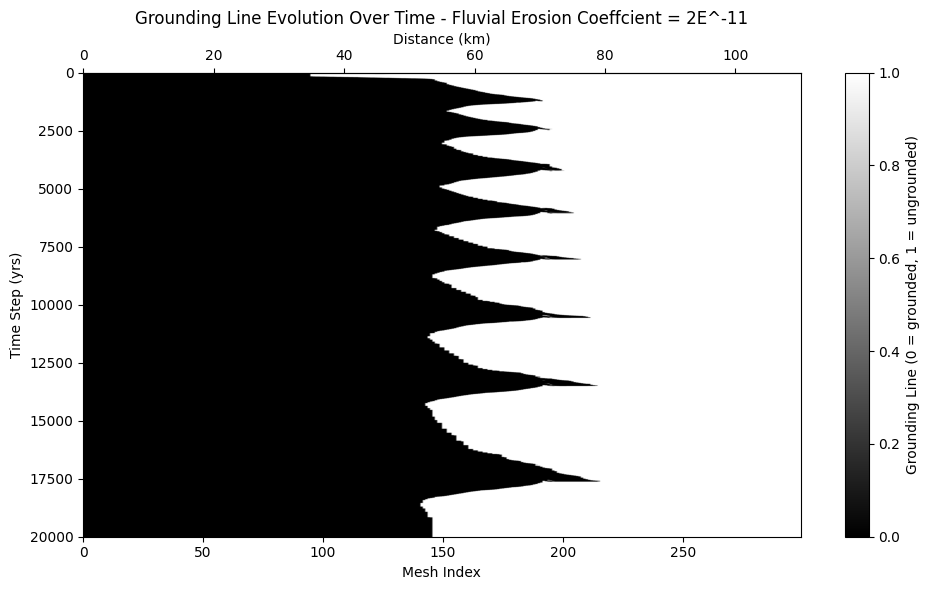

In [129]:
GL_dict = DATA_dict_cc_2e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_2e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [130]:
gl_positions_cc_2e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_2e11.append(idx)

gl_positions_cc_2e11 = np.array(gl_positions_cc_2e11)
GL_km_cc_2e11 = mesh_index_to_km(gl_positions_cc_2e11)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cc_2e11 = GL_km_cc_2e11[mask]

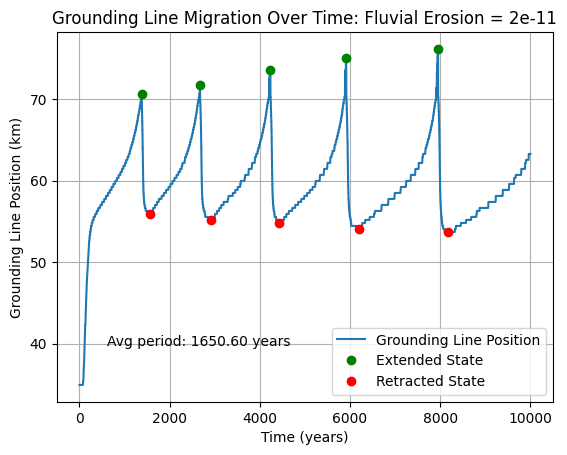

Mean cycle period: 1650.60 years
[1358.26404538 1498.66324554 1781.57558224 1963.88820054]
Mean advance amplitude: 73.43 km
[70.63545151 71.73913043 73.57859532 75.05016722 76.15384615]
Mean retreat amplitude: 54.74 km
[55.91973244 55.18394649 54.81605351 54.08026756 53.71237458]


In [131]:
peaks_cc_2e11, _ = find_peaks(GL_km_cc_2e11, prominence=3, distance = 300) 
troughs_cc_2e11, _ = find_peaks(-GL_km_cc_2e11, prominence=4, distance = 500)     
periods_cc_2e11 = np.diff(np.array(time)[troughs_cc_2e11])
adv_dists_cc_2e11 = GL_km_cc_2e11[peaks_cc_2e11]
ret_dists__cc_2e11 = GL_km_cc_2e11[troughs_cc_2e11]


plt.plot(time, GL_km_cc_2e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_2e11], GL_km_cc_2e11[peaks_cc_2e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_2e11], GL_km_cc_2e11[troughs_cc_2e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_2e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 2e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_2e11):.2f} years")
print(periods_cc_2e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_2e11):.2f} km")
print(adv_dists_cc_2e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_2e11):.2f} km")
print(ret_dists__cc_2e11)


11335.48753306451


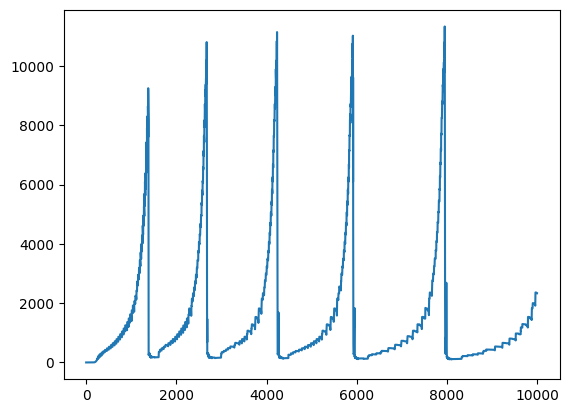

In [132]:
max_Qs_2e11 = np.array([max(values) for values in Qs_dict.values()])
time_2e11 = np.array(list(Qs_dict.keys()))

mask = time_2e11 <= 10000

time_2e11 = time_2e11[mask]
max_Qs_2e11 = max_Qs_2e11[mask]
plt.plot(time_2e11, max_Qs_2e11)
MAX_2e11 = np.max(max_Qs_2e11)

MAX_2e11 = np.max(max_Qs_2e11)
print(MAX_2e11)

Grounding Line plotting - Fluvial Erosion = 2.5 e-11


In [133]:
gl_run_title_cc_25e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 2.5 E^-11")
cc_25e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cc_tests/DATA_Dictionary_2025_04_30__13_31_21_CC25e-11.pkl.gz"
with gzip.open(cc_25e11, 'rb') as f:
    DATA_dict_cc_25e11 = pickle.load(f)

In [134]:
bed_dict25e11 = DATA_dict_cc_25e11['bed_dict']
base_dict = DATA_dict_cc_25e11['base_dict']
surf_dict= DATA_dict_cc_25e11 ['surf_dict']
sed_dict = DATA_dict_cc_25e11['sed_dict']
H_dict = DATA_dict_cc_25e11['H_dict']
us_dict_25e11 = DATA_dict_cc_25e11['us_dict']
ub_dict = DATA_dict_cc_25e11['ub_dict']
Hs_dict = DATA_dict_cc_25e11['Hs_dict']
GL_dict = DATA_dict_cc_25e11['GL_dict']
Qs_dict = DATA_dict_cc_25e11['Qs_dict']
counter_dict_25e11 = DATA_dict_cc_25e11['counter_dict']
SMB_dict_25e11 = DATA_dict_cc_25e11['SMB_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20000.507572173396


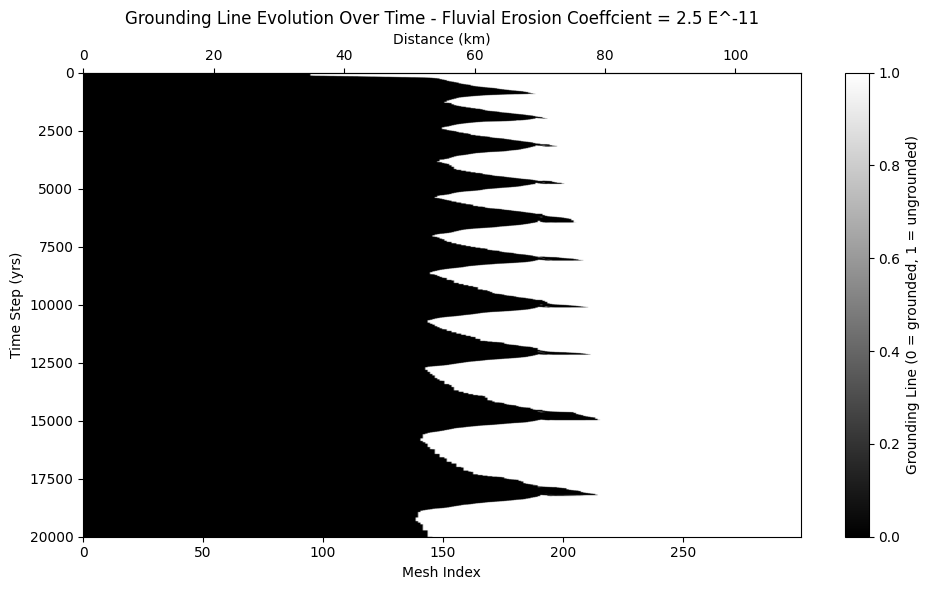

In [135]:
GL_dict = DATA_dict_cc_25e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_25e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [136]:
gl_positions_cc_25e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_25e11.append(idx)

gl_positions_cc_25e11 = np.array(gl_positions_cc_25e11)
GL_km_cc_25e11 = mesh_index_to_km(gl_positions_cc_25e11)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cc_25e11 = GL_km_cc_25e11[mask]

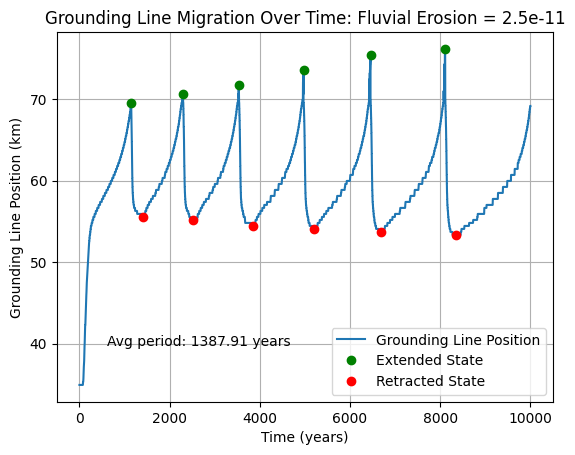

Mean cycle period: 1387.91 years
[1105.60271758 1336.90448385 1358.55852672 1471.47523177 1667.00132872]
Mean advance amplitude: 72.84 km
[69.53177258 70.63545151 71.73913043 73.57859532 75.4180602  76.15384615]
Mean retreat amplitude: 54.39 km
[55.55183946 55.18394649 54.44816054 54.08026756 53.71237458 53.34448161]


In [137]:
peaks_cc_25e11, _ = find_peaks(GL_km_cc_25e11, prominence=5) 
troughs_cc_25e11, _ = find_peaks(-GL_km_cc_25e11, prominence=5)     
periods_cc_25e11 = np.diff(np.array(time)[troughs_cc_25e11])
adv_dists_cc_25e11 = GL_km_cc_25e11[peaks_cc_25e11]
ret_dists__cc_25e11 = GL_km_cc_25e11[troughs_cc_25e11]


plt.plot(time, GL_km_cc_25e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_25e11], GL_km_cc_25e11[peaks_cc_25e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_25e11], GL_km_cc_25e11[troughs_cc_25e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_25e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 2.5e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_25e11):.2f} years")
print(periods_cc_25e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_25e11):.2f} km")
print(adv_dists_cc_25e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_25e11):.2f} km")
print(ret_dists__cc_25e11)


13355.739343208024


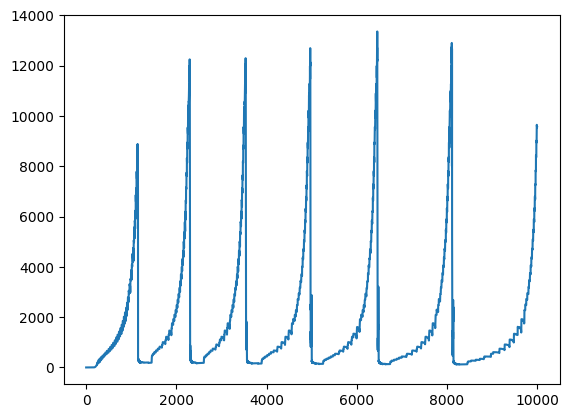

In [138]:
max_Qs_25e11 = np.array([max(values) for values in Qs_dict.values()])
time_25e11 = np.array(list(Qs_dict.keys()))

mask = time_25e11 <= 10000

time_25e11 = time_25e11[mask]
max_Qs_25e11 = max_Qs_25e11[mask]
plt.plot(time_25e11, max_Qs_25e11)
MAX_25e11 = np.max(max_Qs_25e11)

MAX_25e11 = np.max(max_Qs_25e11)
print(MAX_25e11)

Grounding Line plotting - Fluvial Erosion = 3 e-11


In [139]:
gl_run_title_cc_3e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 3 E^-11")
cc_3e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cc_tests/DATA_Dictionary_2025_04_30__14_48_28_CC3e-11.pkl.gz"
with gzip.open(cc_3e11, 'rb') as f:
    DATA_dict_cc_3e11 = pickle.load(f)

In [140]:
bed_dict3e11 = DATA_dict_cc_3e11['bed_dict']
base_dict = DATA_dict_cc_3e11['base_dict']
surf_dict= DATA_dict_cc_3e11 ['surf_dict']
sed_dict = DATA_dict_cc_3e11['sed_dict']
H_dict = DATA_dict_cc_3e11['H_dict']
us_dict_3e11 = DATA_dict_cc_3e11['us_dict']
ub_dict = DATA_dict_cc_3e11['ub_dict']
Hs_dict = DATA_dict_cc_3e11['Hs_dict']
GL_dict = DATA_dict_cc_3e11['GL_dict']
Qs_dict = DATA_dict_cc_3e11['Qs_dict']
counter_dict_3e11 = DATA_dict_cc_3e11['counter_dict']
SMB_dict_3e11 = DATA_dict_cc_3e11['SMB_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20000.07351753791


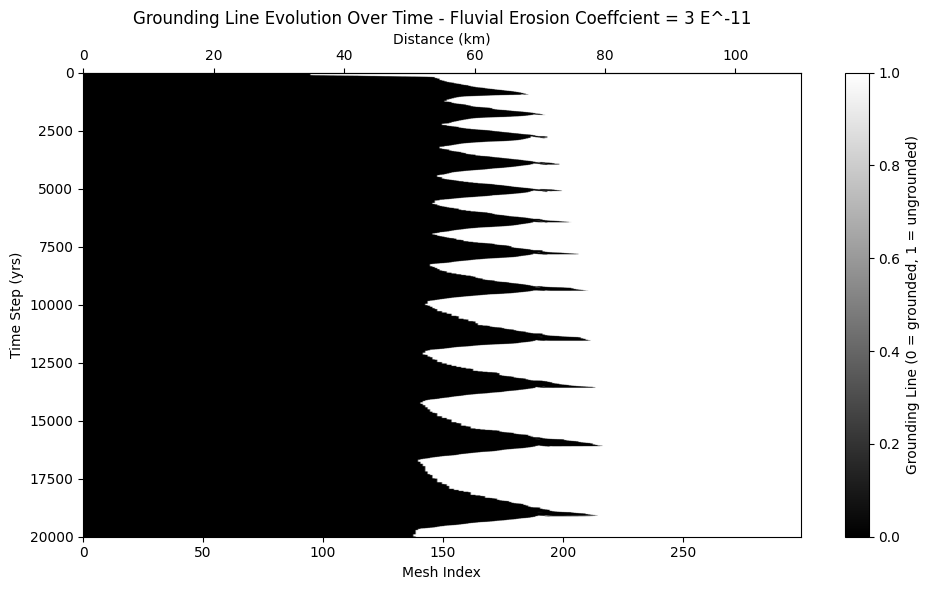

In [141]:
GL_dict = DATA_dict_cc_3e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_3e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [142]:
gl_positions_cc_3e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_3e11.append(idx)

gl_positions_cc_3e11 = np.array(gl_positions_cc_3e11)
GL_km_cc_3e11 = mesh_index_to_km(gl_positions_cc_3e11)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cc_3e11 = GL_km_cc_3e11[mask]

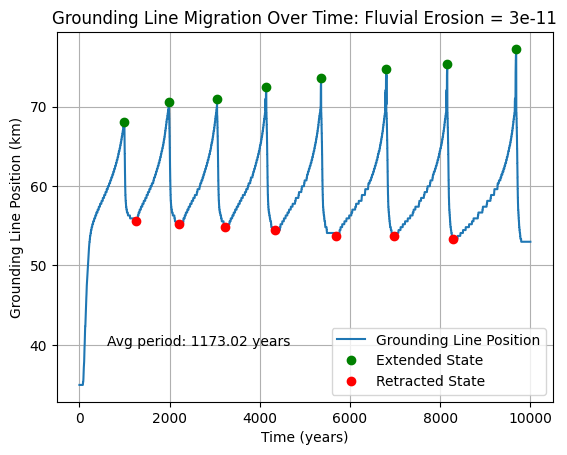

Mean cycle period: 1173.02 years
[ 961.5360103  1013.35973156 1109.11588789 1360.98398127 1265.93268817
 1327.17928128]
Mean advance amplitude: 72.89 km
[68.06020067 70.63545151 71.00334448 72.47491639 73.57859532 74.68227425
 75.4180602  77.25752508]
Mean retreat amplitude: 54.40 km
[55.55183946 55.18394649 54.81605351 54.44816054 53.71237458 53.71237458
 53.34448161]


In [143]:
peaks_cc_3e11, _ = find_peaks(GL_km_cc_3e11, prominence=5) 
troughs_cc_3e11, _ = find_peaks(-GL_km_cc_3e11, prominence=5)     
periods_cc_3e11 = np.diff(np.array(time)[troughs_cc_3e11])
adv_dists_cc_3e11 = GL_km_cc_3e11[peaks_cc_3e11]
ret_dists__cc_3e11 = GL_km_cc_3e11[troughs_cc_3e11]


plt.plot(time, GL_km_cc_3e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_3e11], GL_km_cc_3e11[peaks_cc_3e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_3e11], GL_km_cc_3e11[troughs_cc_3e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_3e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 3e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_3e11):.2f} years")
print(periods_cc_3e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_3e11):.2f} km")
print(adv_dists_cc_3e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_3e11):.2f} km")
print(ret_dists__cc_3e11)


14452.94645773379


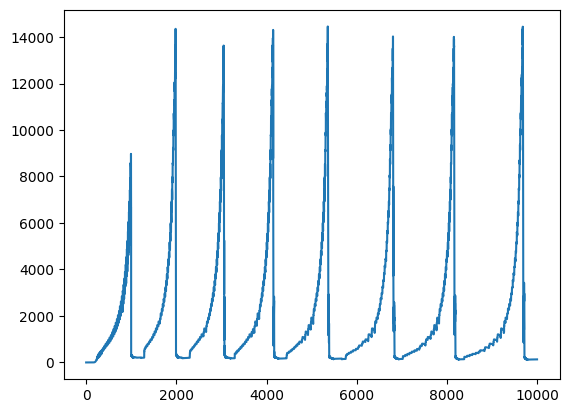

In [144]:
max_Qs_3e11 = np.array([max(values) for values in Qs_dict.values()])
time_3e11 = np.array(list(Qs_dict.keys()))

mask = time_3e11 <= 10000

time_3e11 = time_3e11[mask]
max_Qs_3e11 = max_Qs_3e11[mask]
plt.plot(time_3e11, max_Qs_3e11)
MAX_3e11 = np.max(max_Qs_3e11)

MAX_3e11 = np.max(max_Qs_3e11)
print(MAX_3e11)

Grounding Line plotting - Fluvial Erosion = 3.5 e-11


In [145]:
gl_run_title_cc_35e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 3.5 E^-11")
cc_35e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cc_tests/DATA_Dictionary_2025_04_30__16_14_29_CC35e-11.pkl.gz"
with gzip.open(cc_35e11, 'rb') as f:
    DATA_dict_cc_35e11 = pickle.load(f)

In [146]:
bed_dict35e11 = DATA_dict_cc_35e11['bed_dict']
base_dict = DATA_dict_cc_35e11['base_dict']
surf_dict= DATA_dict_cc_35e11 ['surf_dict']
sed_dict = DATA_dict_cc_35e11['sed_dict']
H_dict = DATA_dict_cc_35e11['H_dict']
us_dict_35e11 = DATA_dict_cc_35e11['us_dict']
ub_dict = DATA_dict_cc_35e11['ub_dict']
Hs_dict = DATA_dict_cc_35e11['Hs_dict']
GL_dict = DATA_dict_cc_35e11['GL_dict']
Qs_dict = DATA_dict_cc_35e11['Qs_dict']
counter_dict_35e11 = DATA_dict_cc_35e11['counter_dict']
SMB_dict_35e11 = DATA_dict_cc_35e11['SMB_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20000.156255157315


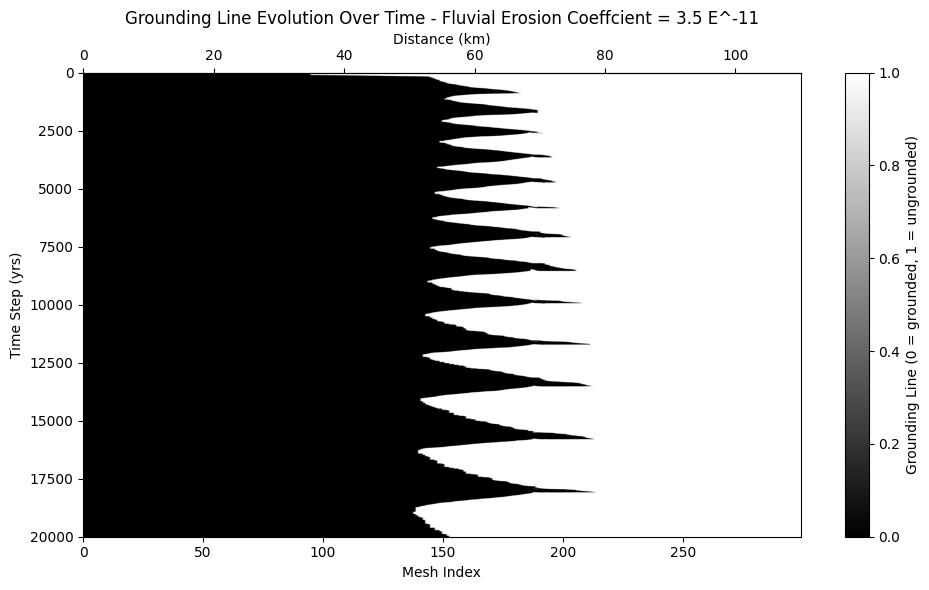

In [147]:
GL_dict = DATA_dict_cc_35e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_35e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [148]:
gl_positions_cc_35e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_35e11.append(idx)

gl_positions_cc_35e11 = np.array(gl_positions_cc_35e11)
GL_km_cc_35e11 = mesh_index_to_km(gl_positions_cc_35e11)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cc_35e11 = GL_km_cc_35e11[mask]

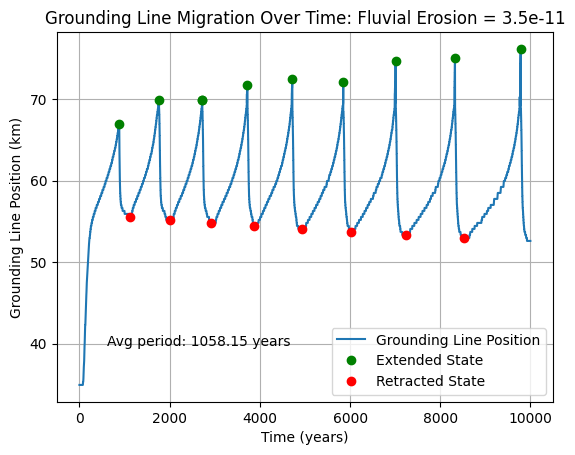

Mean cycle period: 1058.15 years
[ 874.26310772  920.63807144  956.70962468 1059.07416358 1077.79156064
 1227.05645355 1291.51139189]
Mean advance amplitude: 71.89 km
[66.95652174 69.89966555 69.89966555 69.89966555 71.73913043 72.47491639
 72.10702341 74.68227425 75.05016722 76.15384615]
Mean retreat amplitude: 54.26 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 52.97658863]


In [149]:
peaks_cc_35e11, _ = find_peaks(GL_km_cc_35e11, prominence=5) 
troughs_cc_35e11, _ = find_peaks(-GL_km_cc_35e11, prominence=5)     
periods_cc_35e11 = np.diff(np.array(time)[troughs_cc_35e11])
adv_dists_cc_35e11 = GL_km_cc_35e11[peaks_cc_35e11]
ret_dists__cc_35e11 = GL_km_cc_35e11[troughs_cc_35e11]


plt.plot(time, GL_km_cc_35e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_35e11], GL_km_cc_35e11[peaks_cc_35e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_35e11], GL_km_cc_35e11[troughs_cc_35e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_35e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 3.5e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_35e11):.2f} years")
print(periods_cc_35e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_35e11):.2f} km")
print(adv_dists_cc_35e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_35e11):.2f} km")
print(ret_dists__cc_35e11)


15738.60918574888


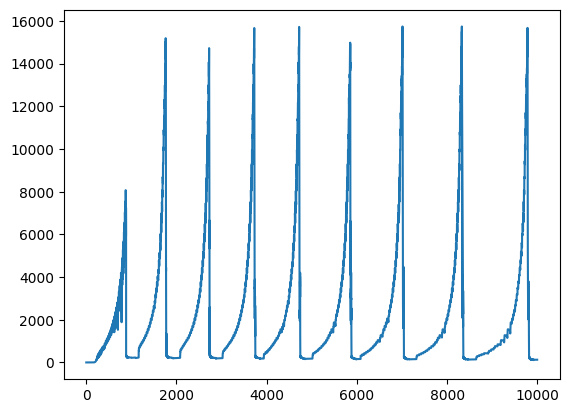

In [150]:
max_Qs_35e11 = np.array([max(values) for values in Qs_dict.values()])
time_35e11 = np.array(list(Qs_dict.keys()))

mask = time_35e11 <= 10000

time_35e11 = time_35e11[mask]
max_Qs_35e11 = max_Qs_35e11[mask]
plt.plot(time_35e11, max_Qs_35e11)
MAX_35e11 = np.max(max_Qs_35e11)

MAX_35e11 = np.max(max_Qs_35e11)
print(MAX_35e11)

Grounding Line plotting - Fluvial Erosion = 4 e-11


In [151]:
gl_run_title_cc_4e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 4 E^-11")
cc_4e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cc_tests/DATA_Dictionary_2025_04_30__18_05_57_CC4e-11.pkl.gz"
with gzip.open(cc_4e11, 'rb') as f:
    DATA_dict_cc_4e11 = pickle.load(f)

In [152]:
bed_dict4e11 = DATA_dict_cc_4e11['bed_dict']
base_dict = DATA_dict_cc_4e11['base_dict']
surf_dict= DATA_dict_cc_4e11 ['surf_dict']
sed_dict = DATA_dict_cc_4e11['sed_dict']
H_dict = DATA_dict_cc_4e11['H_dict']
us_dict_4e11 = DATA_dict_cc_4e11['us_dict']
ub_dict = DATA_dict_cc_4e11['ub_dict']
Hs_dict = DATA_dict_cc_4e11['Hs_dict']
GL_dict = DATA_dict_cc_4e11['GL_dict']
Qs_dict = DATA_dict_cc_4e11['Qs_dict']
counter_dict_4e11 = DATA_dict_cc_4e11['counter_dict']
SMB_dict_4e11 = DATA_dict_cc_4e11['SMB_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20001.392028069928


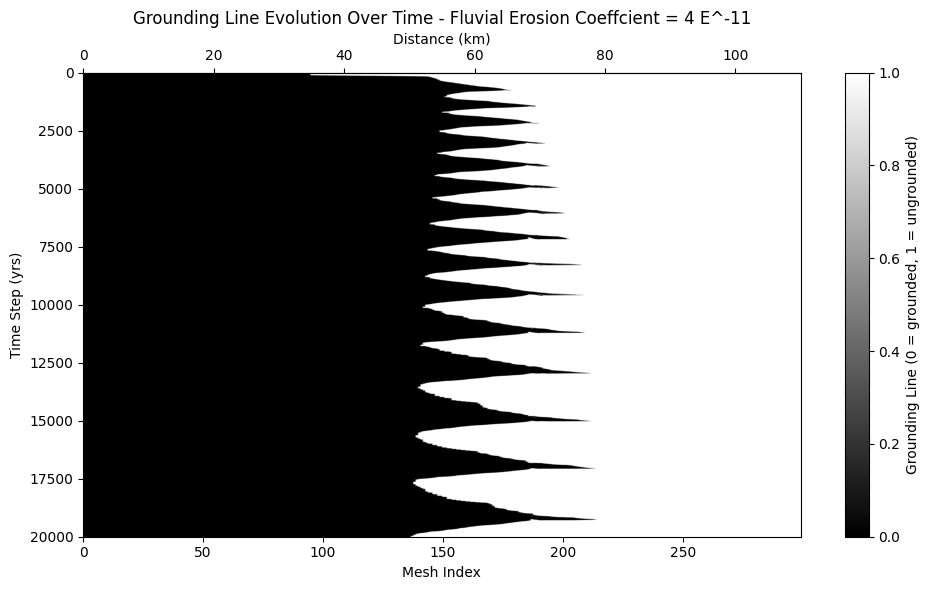

In [153]:
GL_dict = DATA_dict_cc_4e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_4e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [154]:
gl_positions_cc_4e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_4e11.append(idx)

gl_positions_cc_4e11 = np.array(gl_positions_cc_4e11)
GL_km_cc_4e11 = mesh_index_to_km(gl_positions_cc_4e11)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cc_4e11 = GL_km_cc_4e11[mask]

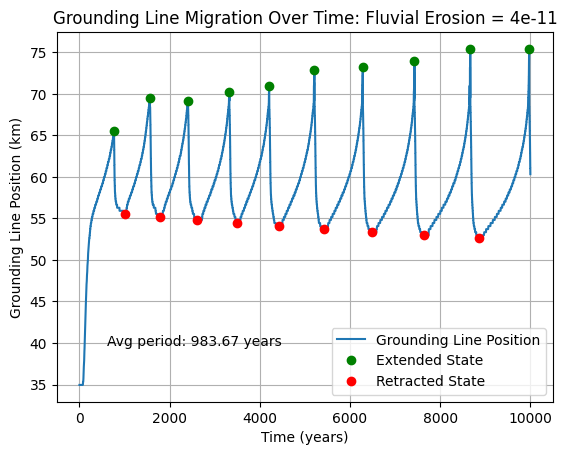

Mean cycle period: 983.67 years
[ 781.15101224  823.76800589  883.3667206   926.71607059 1009.9407842
 1053.57244668 1153.42273792 1237.44164113]
Mean advance amplitude: 71.63 km
[65.48494983 69.53177258 69.1638796  70.26755853 71.00334448 72.84280936
 73.21070234 73.94648829 75.4180602  75.4180602 ]
Mean retreat amplitude: 54.08 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 52.97658863 52.60869565]


In [155]:
peaks_cc_4e11, _ = find_peaks(GL_km_cc_4e11, prominence=5) 
troughs_cc_4e11, _ = find_peaks(-GL_km_cc_4e11, prominence=5)     
periods_cc_4e11 = np.diff(np.array(time)[troughs_cc_4e11])
adv_dists_cc_4e11 = GL_km_cc_4e11[peaks_cc_4e11]
ret_dists__cc_4e11 = GL_km_cc_4e11[troughs_cc_4e11]


plt.plot(time, GL_km_cc_4e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_4e11], GL_km_cc_4e11[peaks_cc_4e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_4e11], GL_km_cc_4e11[troughs_cc_4e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_4e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 4e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_4e11):.2f} years")
print(periods_cc_4e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_4e11):.2f} km")
print(adv_dists_cc_4e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_4e11):.2f} km")
print(ret_dists__cc_4e11)


17115.357160998352


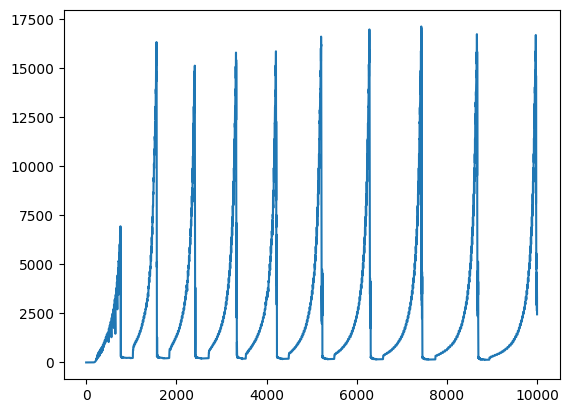

In [156]:
max_Qs_4e11 = np.array([max(values) for values in Qs_dict.values()])
time_4e11 = np.array(list(Qs_dict.keys()))

mask = time_4e11 <= 10000

time_4e11 = time_4e11[mask]
max_Qs_4e11 = max_Qs_4e11[mask]
plt.plot(time_4e11, max_Qs_4e11)
MAX_4e11 = np.max(max_Qs_4e11)

MAX_4e11 = np.max(max_Qs_4e11)
print(MAX_4e11)

Grounding Line plotting - Fluvial Erosion = 4.5 e-11


In [157]:
gl_run_title_cc_45e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 4.5E^-11")
cc_45e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cc_tests/DATA_Dictionary_2025_05_01__00_17_46_CC45e-11.pkl.gz"
with gzip.open(cc_45e11, 'rb') as f:
    DATA_dict_cc_45e11 = pickle.load(f)

In [158]:
bed_dict45e11 = DATA_dict_cc_45e11['bed_dict']
base_dict = DATA_dict_cc_45e11['base_dict']
surf_dict= DATA_dict_cc_45e11 ['surf_dict']
sed_dict = DATA_dict_cc_45e11['sed_dict']
H_dict = DATA_dict_cc_45e11['H_dict']
us_dict_45e11 = DATA_dict_cc_45e11['us_dict']
ub_dict = DATA_dict_cc_45e11['ub_dict']
Hs_dict = DATA_dict_cc_45e11['Hs_dict']
GL_dict = DATA_dict_cc_45e11['GL_dict']
Qs_dict = DATA_dict_cc_45e11['Qs_dict']
counter_dict_45e11 = DATA_dict_cc_45e11['counter_dict']
SMB_dict_45e11 = DATA_dict_cc_45e11['SMB_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20001.603851236127


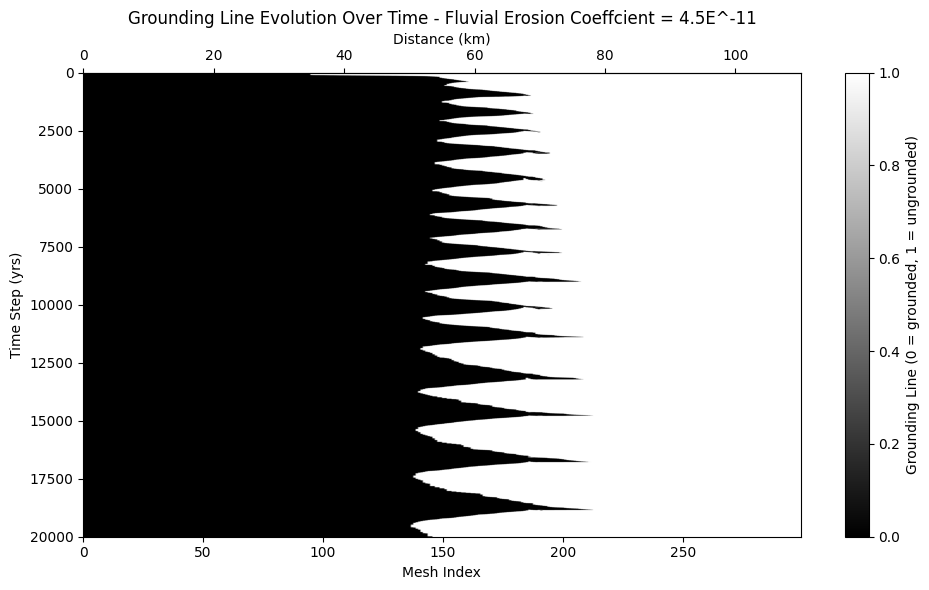

In [159]:
GL_dict = DATA_dict_cc_45e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_45e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [160]:
gl_positions_cc_45e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_45e11.append(idx)

gl_positions_cc_45e11 = np.array(gl_positions_cc_45e11)
GL_km_cc_45e11 = mesh_index_to_km(gl_positions_cc_45e11)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cc_45e11 = GL_km_cc_45e11[mask]

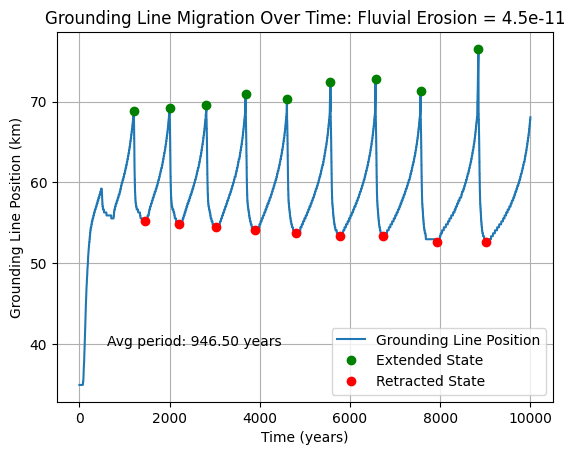

Mean cycle period: 946.50 years
[ 762.12824795  815.89401956  864.91281732  899.79124739  971.5700283
  960.98581662 1209.65325701 1087.06446039]
Mean advance amplitude: 71.33 km
[68.79598662 69.1638796  69.53177258 71.00334448 70.26755853 72.47491639
 72.84280936 71.37123746 76.52173913]
Mean retreat amplitude: 53.79 km
[55.18394649 54.81605351 54.44816054 54.08026756 53.71237458 53.34448161
 53.34448161 52.60869565 52.60869565]


In [161]:
peaks_cc_45e11, _ = find_peaks(GL_km_cc_45e11, prominence=5) 
troughs_cc_45e11, _ = find_peaks(-GL_km_cc_45e11, prominence=5)     
periods_cc_45e11 = np.diff(np.array(time)[troughs_cc_45e11])
adv_dists_cc_45e11 = GL_km_cc_45e11[peaks_cc_45e11]
ret_dists__cc_45e11 = GL_km_cc_45e11[troughs_cc_45e11]


plt.plot(time, GL_km_cc_45e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_45e11], GL_km_cc_45e11[peaks_cc_45e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_45e11], GL_km_cc_45e11[troughs_cc_45e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_45e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 4.5e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_45e11):.2f} years")
print(periods_cc_45e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_45e11):.2f} km")
print(adv_dists_cc_45e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_45e11):.2f} km")
print(ret_dists__cc_45e11)


18389.4139275936


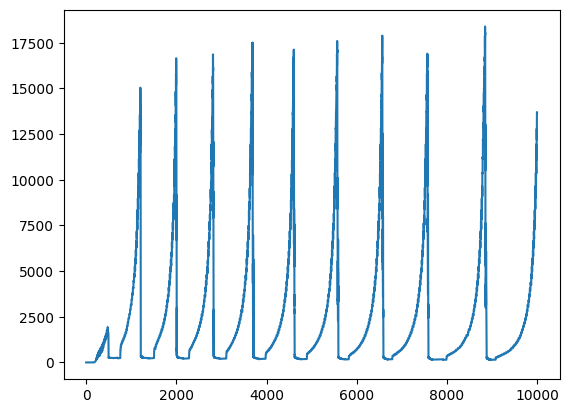

In [162]:
max_Qs_45e11 = np.array([max(values) for values in Qs_dict.values()])
time_45e11 = np.array(list(Qs_dict.keys()))

mask = time_45e11 <= 10000

time_45e11 = time_45e11[mask]
max_Qs_45e11 = max_Qs_45e11[mask]
plt.plot(time_45e11, max_Qs_45e11)
MAX_45e11 = np.max(max_Qs_45e11)

MAX_45e11 = np.max(max_Qs_45e11)
print(MAX_45e11)

Grounding Line plotting - Fluvial Erosion = 5 e-11


In [163]:
gl_run_title_cc_5e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 5.0 E^-11")
cc_5e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cc_tests/DATA_Dictionary_2025_05_01__02_04_33_CC5e-11.pkl.gz"
with gzip.open(cc_5e11, 'rb') as f:
    DATA_dict_cc_5e11 = pickle.load(f)

In [164]:
bed_dict5e11 = DATA_dict_cc_5e11['bed_dict']
base_dict = DATA_dict_cc_5e11['base_dict']
surf_dict= DATA_dict_cc_5e11 ['surf_dict']
sed_dict = DATA_dict_cc_5e11['sed_dict']
H_dict = DATA_dict_cc_5e11['H_dict']
us_dict_5e11 = DATA_dict_cc_5e11['us_dict']
ub_dict = DATA_dict_cc_5e11['ub_dict']
Hs_dict = DATA_dict_cc_5e11['Hs_dict']
GL_dict = DATA_dict_cc_5e11['GL_dict']
Qs_dict = DATA_dict_cc_5e11['Qs_dict']
counter_dict_5e11 = DATA_dict_cc_5e11['counter_dict']
SMB_dict_5e11 = DATA_dict_cc_5e11['SMB_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20002.06638489569


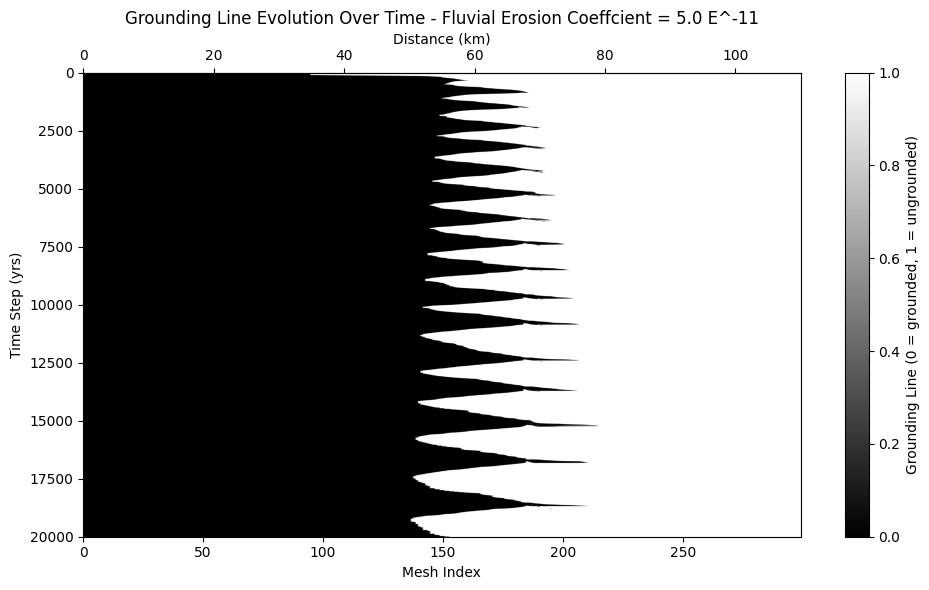

In [165]:
GL_dict = DATA_dict_cc_5e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_5e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [166]:
gl_positions_cc_5e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_5e11.append(idx)

gl_positions_cc_5e11 = np.array(gl_positions_cc_5e11)
GL_km_cc_5e11 = mesh_index_to_km(gl_positions_cc_5e11)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cc_5e11 = GL_km_cc_5e11[mask]

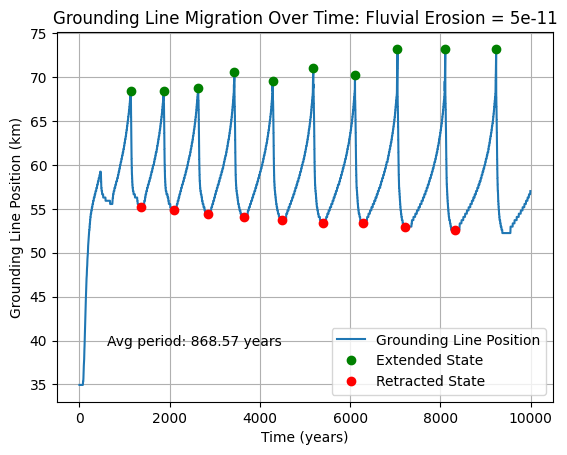

Mean cycle period: 868.57 years
[ 721.10593334  755.54657117  808.58369559  835.96918     911.25251579
  878.57957437  932.10549817 1105.41872961]
Mean advance amplitude: 70.67 km
[68.42809365 68.42809365 68.79598662 70.63545151 69.53177258 71.00334448
 70.26755853 73.21070234 73.21070234 73.21070234]
Mean retreat amplitude: 53.84 km
[55.18394649 54.81605351 54.44816054 54.08026756 53.71237458 53.34448161
 53.34448161 52.97658863 52.60869565]


In [167]:
peaks_cc_5e11, _ = find_peaks(GL_km_cc_5e11, prominence=5) 
troughs_cc_5e11, _ = find_peaks(-GL_km_cc_5e11, prominence=5)     
periods_cc_5e11 = np.diff(np.array(time)[troughs_cc_5e11])
adv_dists_cc_5e11 = GL_km_cc_5e11[peaks_cc_5e11]
ret_dists__cc_5e11 = GL_km_cc_5e11[troughs_cc_5e11]


plt.plot(time, GL_km_cc_5e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_5e11], GL_km_cc_5e11[peaks_cc_5e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_5e11], GL_km_cc_5e11[troughs_cc_5e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_5e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 5e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_5e11):.2f} years")
print(periods_cc_5e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_5e11):.2f} km")
print(adv_dists_cc_5e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_5e11):.2f} km")
print(ret_dists__cc_5e11)


19499.426505518742


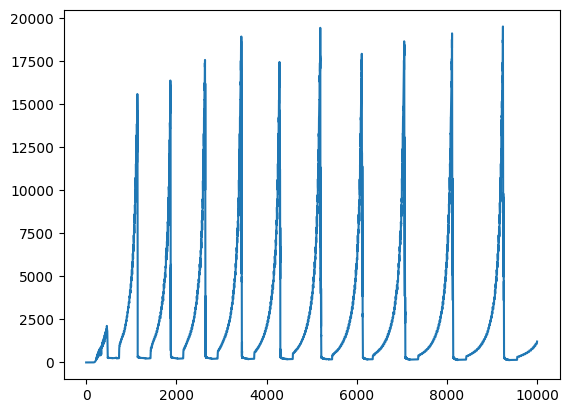

In [168]:
max_Qs_5e11 = np.array([max(values) for values in Qs_dict.values()])
time_5e11 = np.array(list(Qs_dict.keys()))

mask = time_5e11 <= 10000

time_5e11 = time_5e11[mask]
max_Qs_5e11 = max_Qs_5e11[mask]
plt.plot(time_5e11, max_Qs_5e11)
MAX_5e11 = np.max(max_Qs_5e11)

MAX_5e11 = np.max(max_Qs_5e11)
print(MAX_5e11)

Grounding Line plotting - Fluvial Erosion = 5.5 e-11


In [169]:
gl_run_title_cc_55e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 5.5 E^-11")
cc_55e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cc_tests/DATA_Dictionary_2025_05_01__12_15_28_CC55e-11.pkl.gz"
with gzip.open(cc_55e11, 'rb') as f:
    DATA_dict_cc_55e11 = pickle.load(f)

In [170]:
bed_dict55e11 = DATA_dict_cc_55e11['bed_dict']
base_dict = DATA_dict_cc_55e11['base_dict']
surf_dict= DATA_dict_cc_55e11 ['surf_dict']
sed_dict = DATA_dict_cc_55e11['sed_dict']
H_dict = DATA_dict_cc_55e11['H_dict']
us_dict_55e11 = DATA_dict_cc_55e11['us_dict']
ub_dict = DATA_dict_cc_55e11['ub_dict']
Hs_dict = DATA_dict_cc_55e11['Hs_dict']
GL_dict = DATA_dict_cc_55e11['GL_dict']
Qs_dict = DATA_dict_cc_55e11['Qs_dict']
counter_dict_55e11 = DATA_dict_cc_55e11['counter_dict']
SMB_dict_55e11 = DATA_dict_cc_55e11['SMB_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20000.944109387117


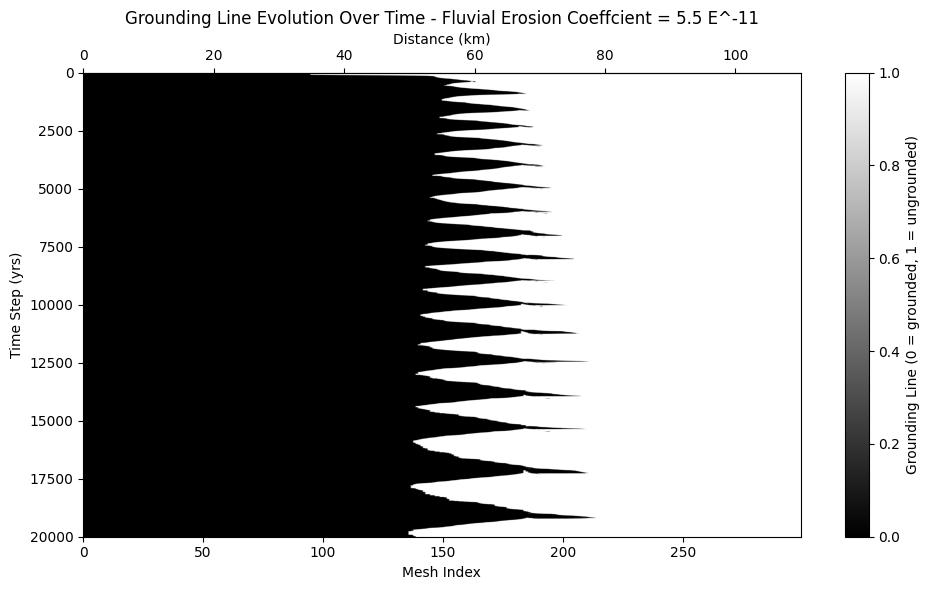

In [171]:
GL_dict = DATA_dict_cc_55e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_55e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [172]:
gl_positions_cc_55e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_55e11.append(idx)

gl_positions_cc_55e11 = np.array(gl_positions_cc_55e11)
GL_km_cc_55e11 = mesh_index_to_km(gl_positions_cc_55e11)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cc_55e11 = GL_km_cc_55e11[mask]

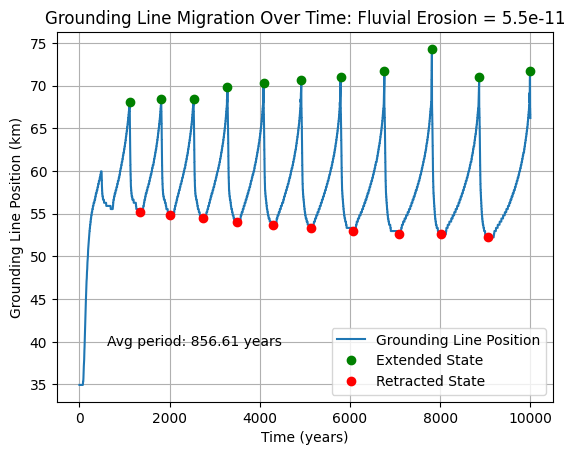

Mean cycle period: 856.61 years
[ 656.43356539  722.43211734  773.35172153  785.51149946  849.37194618
  936.35846369 1007.2873805   933.37111739 1045.36391691]
Mean advance amplitude: 70.50 km
[68.06020067 68.42809365 68.42809365 69.89966555 70.26755853 70.63545151
 71.00334448 71.73913043 74.31438127 71.00334448 71.73913043]
Mean retreat amplitude: 53.60 km
[55.18394649 54.81605351 54.44816054 54.08026756 53.71237458 53.34448161
 52.97658863 52.60869565 52.60869565 52.24080268]


In [173]:
peaks_cc_55e11, _ = find_peaks(GL_km_cc_55e11, prominence=5) 
troughs_cc_55e11, _ = find_peaks(-GL_km_cc_55e11, prominence=5)     
periods_cc_55e11 = np.diff(np.array(time)[troughs_cc_55e11])
adv_dists_cc_55e11 = GL_km_cc_55e11[peaks_cc_55e11]
ret_dists__cc_55e11 = GL_km_cc_55e11[troughs_cc_55e11]


plt.plot(time, GL_km_cc_55e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_55e11], GL_km_cc_55e11[peaks_cc_55e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_55e11], GL_km_cc_55e11[troughs_cc_55e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_55e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 5.5e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_55e11):.2f} years")
print(periods_cc_55e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_55e11):.2f} km")
print(adv_dists_cc_55e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_55e11):.2f} km")
print(ret_dists__cc_55e11)


20479.06639495816


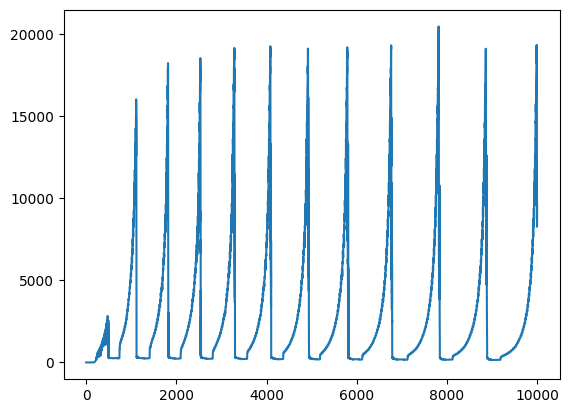

In [174]:
max_Qs_55e11 = np.array([max(values) for values in Qs_dict.values()])
time_55e11 = np.array(list(Qs_dict.keys()))

mask = time_55e11 <= 10000

time_55e11 = time_55e11[mask]
max_Qs_55e11 = max_Qs_55e11[mask]
plt.plot(time_55e11, max_Qs_55e11)
MAX_55e11 = np.max(max_Qs_55e11)

MAX_55e11 = np.max(max_Qs_55e11)
print(MAX_55e11)

Grounding Line plotting - Fluvial Erosion = 6 e-11


In [175]:
gl_run_title_cc_6e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 6.0 E^-11")
cc_6e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cc_tests/DATA_Dictionary_2025_05_01__13_16_41_CC6e-11.pkl.gz"
with gzip.open(cc_6e11, 'rb') as f:
    DATA_dict_cc_6e11 = pickle.load(f)

In [176]:
bed_dict6e11 = DATA_dict_cc_6e11['bed_dict']
base_dict = DATA_dict_cc_6e11['base_dict']
surf_dict= DATA_dict_cc_6e11 ['surf_dict']
sed_dict = DATA_dict_cc_6e11['sed_dict']
H_dict = DATA_dict_cc_6e11['H_dict']
us_dict_6e11 = DATA_dict_cc_6e11['us_dict']
ub_dict = DATA_dict_cc_6e11['ub_dict']
Hs_dict = DATA_dict_cc_6e11['Hs_dict']
GL_dict = DATA_dict_cc_6e11['GL_dict']
Qs_dict = DATA_dict_cc_6e11['Qs_dict']
counter_dict_6e11 = DATA_dict_cc_6e11['counter_dict']
SMB_dict_6e11 = DATA_dict_cc_6e11['SMB_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20003.302611410203


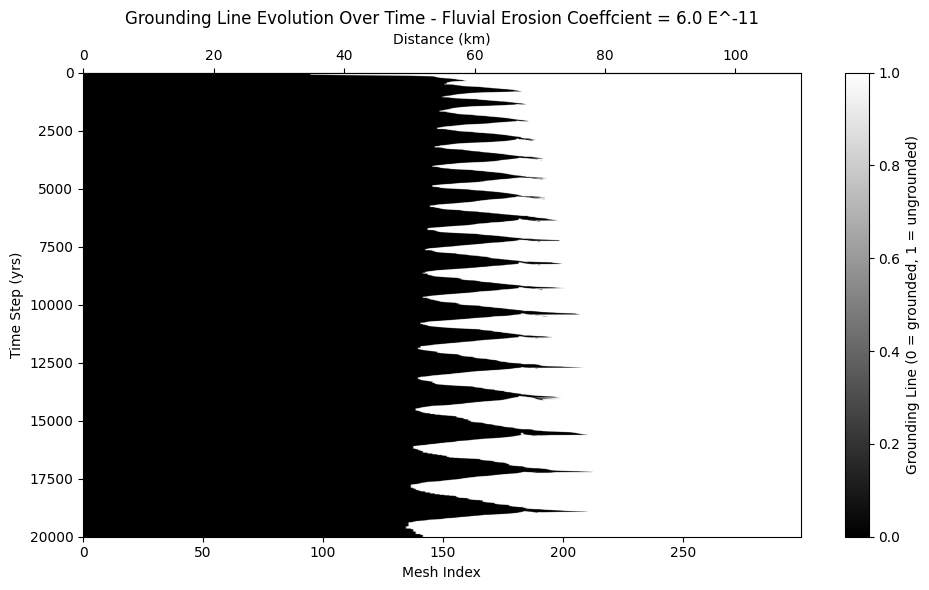

In [177]:
GL_dict = DATA_dict_cc_6e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_6e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [178]:
gl_positions_cc_6e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_6e11.append(idx)

gl_positions_cc_6e11 = np.array(gl_positions_cc_6e11)
GL_km_cc_6e11 = mesh_index_to_km(gl_positions_cc_6e11)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cc_6e11 = GL_km_cc_6e11[mask]

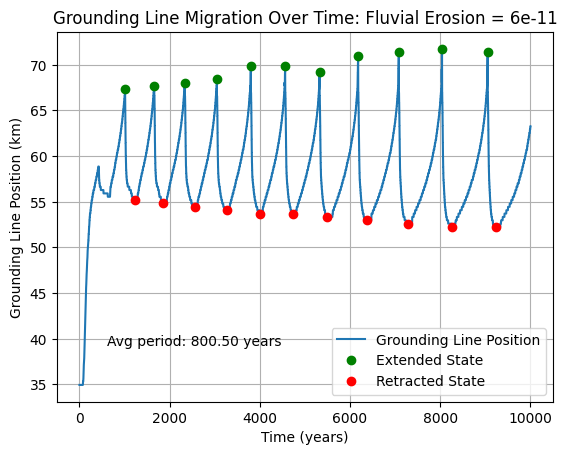

Mean cycle period: 800.50 years
[629.30262624 698.13789551 718.27044565 731.94742708 735.27656556
 747.04460504 891.91413111 900.74892748 988.0505182  964.26983295]
Mean advance amplitude: 69.63 km
[67.32441472 67.69230769 68.06020067 68.42809365 69.89966555 69.89966555
 69.1638796  71.00334448 71.37123746 71.73913043 71.37123746]
Mean retreat amplitude: 53.58 km
[55.18394649 54.81605351 54.44816054 54.08026756 53.71237458 53.71237458
 53.34448161 52.97658863 52.60869565 52.24080268 52.24080268]


In [179]:
peaks_cc_6e11, _ = find_peaks(GL_km_cc_6e11, prominence=4) 
troughs_cc_6e11, _ = find_peaks(-GL_km_cc_6e11, prominence=4)     
periods_cc_6e11 = np.diff(np.array(time)[troughs_cc_6e11])
adv_dists_cc_6e11 = GL_km_cc_6e11[peaks_cc_6e11]
ret_dists__cc_6e11 = GL_km_cc_6e11[troughs_cc_6e11]


plt.plot(time, GL_km_cc_6e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_6e11], GL_km_cc_6e11[peaks_cc_6e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_6e11], GL_km_cc_6e11[troughs_cc_6e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_6e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 6e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_6e11):.2f} years")
print(periods_cc_6e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_6e11):.2f} km")
print(adv_dists_cc_6e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_6e11):.2f} km")
print(ret_dists__cc_6e11)


20699.652682560536


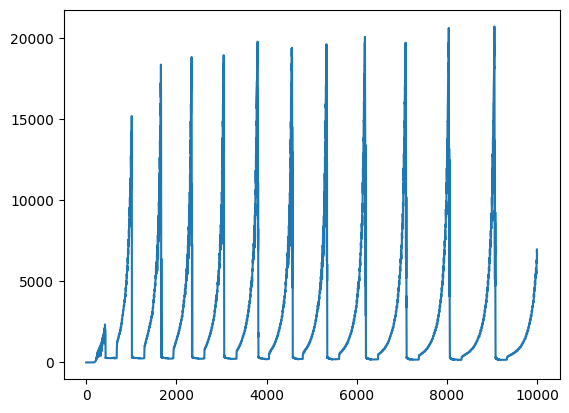

In [180]:
max_Qs_6e11 = np.array([max(values) for values in Qs_dict.values()])
time_6e11 = np.array(list(Qs_dict.keys()))

mask = time_6e11 <= 10000

time_6e11 = time_6e11[mask]
max_Qs_6e11 = max_Qs_6e11[mask]
plt.plot(time_6e11, max_Qs_6e11)
MAX_6e11 = np.max(max_Qs_6e11)

MAX_6e11 = np.max(max_Qs_6e11)
print(MAX_6e11)

Grounding Line plotting - Fluvial Erosion = 6.5 e-11


In [181]:
gl_run_title_cc_65e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 6.5 E^-11")
cc_65e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cc_tests/DATA_Dictionary_2025_05_01__14_28_12_CC65e-11.pkl.gz"
with gzip.open(cc_65e11, 'rb') as f:
    DATA_dict_cc_65e11 = pickle.load(f)

In [182]:
bed_dict65e11 = DATA_dict_cc_65e11['bed_dict']
base_dict = DATA_dict_cc_65e11['base_dict']
surf_dict= DATA_dict_cc_65e11 ['surf_dict']
sed_dict = DATA_dict_cc_65e11['sed_dict']
H_dict = DATA_dict_cc_65e11['H_dict']
us_dict_65e11 = DATA_dict_cc_65e11['us_dict']
ub_dict = DATA_dict_cc_65e11['ub_dict']
Hs_dict = DATA_dict_cc_65e11['Hs_dict']
GL_dict = DATA_dict_cc_65e11['GL_dict']
Qs_dict = DATA_dict_cc_65e11['Qs_dict']
counter_dict_65e11 = DATA_dict_cc_65e11['counter_dict']
SMB_dict_65e11 = DATA_dict_cc_65e11['SMB_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20000.375304118774


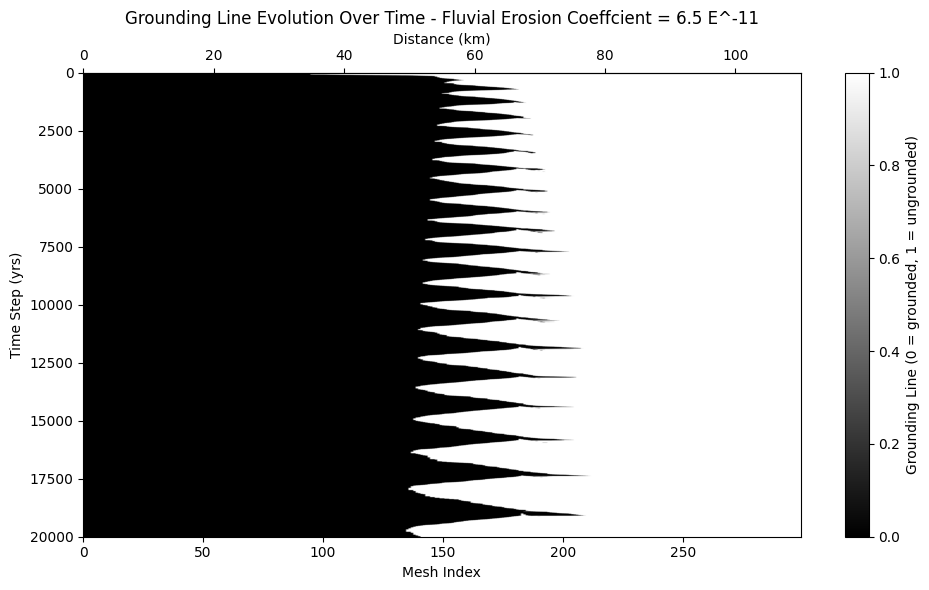

In [183]:
GL_dict = DATA_dict_cc_65e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_65e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [184]:
gl_positions_cc_65e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_65e11.append(idx)

gl_positions_cc_65e11 = np.array(gl_positions_cc_65e11)
GL_km_cc_65e11 = mesh_index_to_km(gl_positions_cc_65e11)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cc_65e11 = GL_km_cc_65e11[mask]

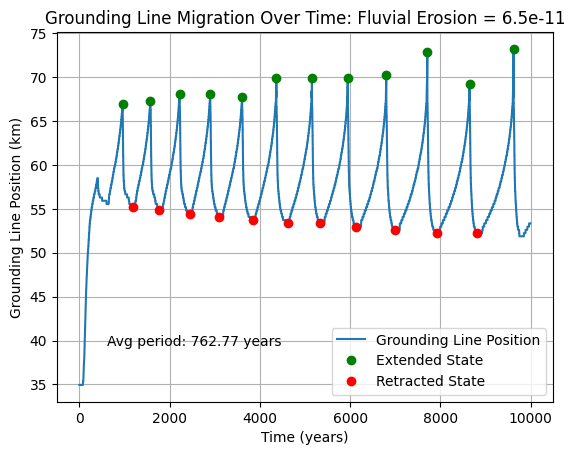

Mean cycle period: 762.77 years
[587.66023853 668.92337615 660.77191623 748.54774274 761.72290341
 715.60927403 802.4131019  859.42173779 939.04343101 883.59549569]
Mean advance amplitude: 69.44 km
[66.95652174 67.32441472 68.06020067 68.06020067 67.69230769 69.89966555
 69.89966555 69.89966555 70.26755853 72.84280936 69.1638796  73.21070234]
Mean retreat amplitude: 53.55 km
[55.18394649 54.81605351 54.44816054 54.08026756 53.71237458 53.34448161
 53.34448161 52.97658863 52.60869565 52.24080268 52.24080268]


In [185]:
peaks_cc_65e11, _ = find_peaks(GL_km_cc_65e11, prominence=5) 
troughs_cc_65e11, _ = find_peaks(-GL_km_cc_65e11, prominence=5)     
periods_cc_65e11 = np.diff(np.array(time)[troughs_cc_65e11])
adv_dists_cc_65e11 = GL_km_cc_65e11[peaks_cc_65e11]
ret_dists__cc_65e11 = GL_km_cc_65e11[troughs_cc_65e11]


plt.plot(time, GL_km_cc_65e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_65e11], GL_km_cc_65e11[peaks_cc_65e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_65e11], GL_km_cc_65e11[troughs_cc_65e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_65e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 6.5e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_65e11):.2f} years")
print(periods_cc_65e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_65e11):.2f} km")
print(adv_dists_cc_65e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_65e11):.2f} km")
print(ret_dists__cc_65e11)


21317.832977159367


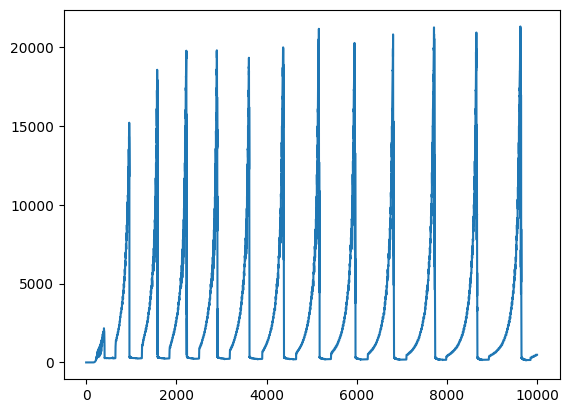

In [186]:
max_Qs_65e11 = np.array([max(values) for values in Qs_dict.values()])
time_65e11 = np.array(list(Qs_dict.keys()))

mask = time_65e11 <= 10000

time_65e11 = time_65e11[mask]
max_Qs_65e11 = max_Qs_65e11[mask]
plt.plot(time_65e11, max_Qs_65e11)
MAX_65e11 = np.max(max_Qs_65e11)

MAX_65e11 = np.max(max_Qs_65e11)
print(MAX_65e11)

Grounding Line plotting - Fluvial Erosion = 7 e-11


In [187]:
gl_run_title_cc_7e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 7.0 E^-11")
cc_7e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cc_tests/DATA_Dictionary_2025_05_01__15_34_56_CC7e-11.pkl.gz"
with gzip.open(cc_7e11, 'rb') as f:
    DATA_dict_cc_7e11 = pickle.load(f)

In [188]:
bed_dict7e11 = DATA_dict_cc_7e11['bed_dict']
base_dict = DATA_dict_cc_7e11['base_dict']
surf_dict= DATA_dict_cc_7e11 ['surf_dict']
sed_dict = DATA_dict_cc_7e11['sed_dict']
H_dict = DATA_dict_cc_7e11['H_dict']
us_dict_7e11 = DATA_dict_cc_7e11['us_dict']
ub_dict = DATA_dict_cc_7e11['ub_dict']
Hs_dict = DATA_dict_cc_7e11['Hs_dict']
GL_dict = DATA_dict_cc_7e11['GL_dict']
Qs_dict = DATA_dict_cc_7e11['Qs_dict']
counter_dict_7e11 = DATA_dict_cc_7e11['counter_dict']
SMB_dict_7e11 = DATA_dict_cc_7e11['SMB_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20000.7081275801


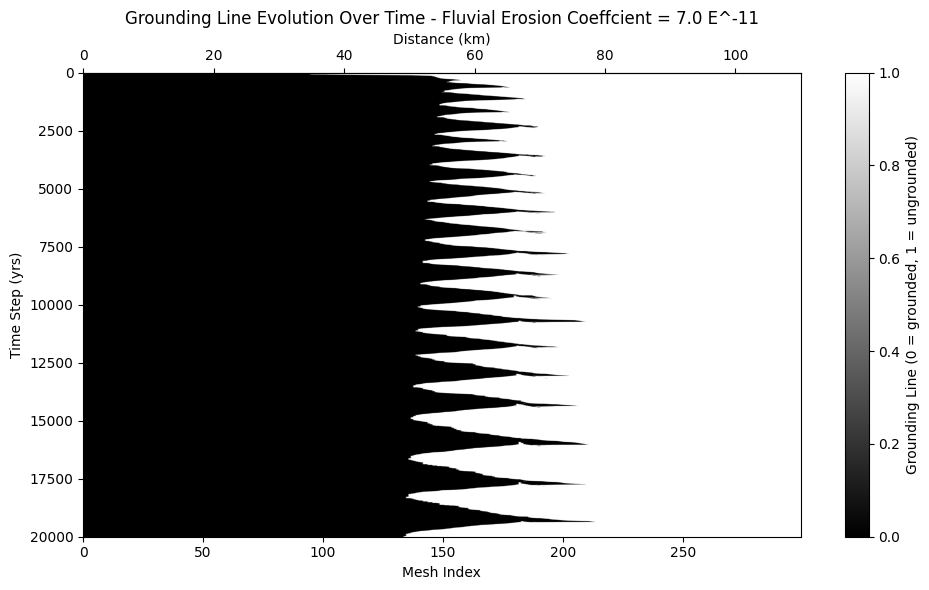

In [189]:
GL_dict = DATA_dict_cc_7e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_7e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [190]:
gl_positions_cc_7e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_7e11.append(idx)

gl_positions_cc_7e11 = np.array(gl_positions_cc_7e11)
GL_km_cc_7e11 = mesh_index_to_km(gl_positions_cc_7e11)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cc_7e11 = GL_km_cc_7e11[mask]

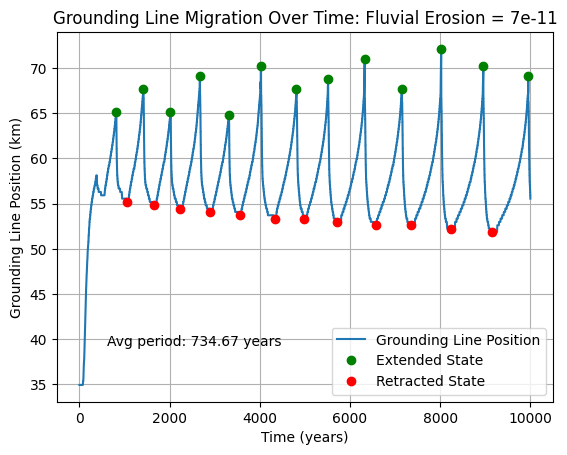

Mean cycle period: 734.67 years
[598.76774225 567.1617516  670.42807962 655.05139892 772.95181154
 660.20206048 719.04058949 865.74456402 779.2300173  889.002652
 903.73996403]
Mean advance amplitude: 68.37 km
[65.11705686 67.69230769 65.11705686 69.1638796  64.74916388 70.26755853
 67.69230769 68.79598662 71.00334448 67.69230769 72.10702341 70.26755853
 69.1638796 ]
Mean retreat amplitude: 53.44 km
[55.18394649 54.81605351 54.44816054 54.08026756 53.71237458 53.34448161
 53.34448161 52.97658863 52.60869565 52.60869565 52.24080268 51.8729097 ]


In [191]:
peaks_cc_7e11, _ = find_peaks(GL_km_cc_7e11, prominence=3) 
troughs_cc_7e11, _ = find_peaks(-GL_km_cc_7e11, prominence=3)     
periods_cc_7e11 = np.diff(np.array(time)[troughs_cc_7e11])
adv_dists_cc_7e11 = GL_km_cc_7e11[peaks_cc_7e11]
ret_dists__cc_7e11 = GL_km_cc_7e11[troughs_cc_7e11]


plt.plot(time, GL_km_cc_7e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_7e11], GL_km_cc_7e11[peaks_cc_7e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_7e11], GL_km_cc_7e11[troughs_cc_7e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_7e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 7e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_7e11):.2f} years")
print(periods_cc_7e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_7e11):.2f} km")
print(adv_dists_cc_7e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_7e11):.2f} km")
print(ret_dists__cc_7e11)


23662.87861957


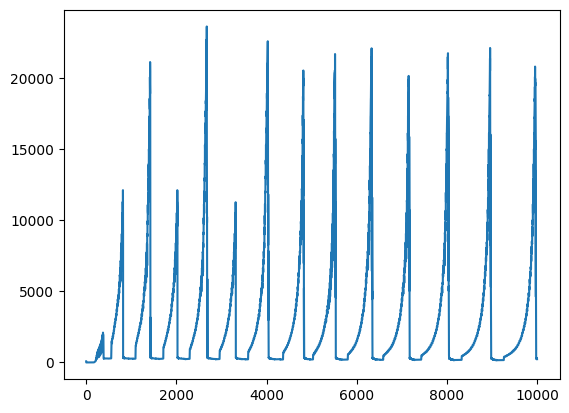

In [192]:
max_Qs_7e11 = np.array([max(values) for values in Qs_dict.values()])
time_7e11 = np.array(list(Qs_dict.keys()))

mask = time_7e11 <= 10000

time_7e11 = time_7e11[mask]
max_Qs_7e11 = max_Qs_7e11[mask]
plt.plot(time_7e11, max_Qs_7e11)
MAX_7e11 = np.max(max_Qs_7e11)

MAX_7e11 = np.max(max_Qs_7e11)
print(MAX_7e11)

Grounding Line plotting - Fluvial Erosion = 7.5 e-11


In [193]:
gl_run_title_cc_75e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 7.5 E^-11")
cc_75e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cc_tests/DATA_Dictionary_2025_05_01__17_53_11_CC75e-11.pkl.gz"
with gzip.open(cc_75e11, 'rb') as f:
    DATA_dict_cc_75e11 = pickle.load(f)

In [194]:
bed_dict75e11 = DATA_dict_cc_75e11['bed_dict']
base_dict = DATA_dict_cc_75e11['base_dict']
surf_dict= DATA_dict_cc_75e11 ['surf_dict']
sed_dict = DATA_dict_cc_75e11['sed_dict']
H_dict = DATA_dict_cc_75e11['H_dict']
us_dict_75e11 = DATA_dict_cc_75e11['us_dict']
ub_dict = DATA_dict_cc_75e11['ub_dict']
Hs_dict = DATA_dict_cc_75e11['Hs_dict']
GL_dict = DATA_dict_cc_75e11['GL_dict']
Qs_dict = DATA_dict_cc_75e11['Qs_dict']
counter_dict_75e11 = DATA_dict_cc_75e11['counter_dict']
SMB_dict_75e11 = DATA_dict_cc_75e11['SMB_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20000.019207516445


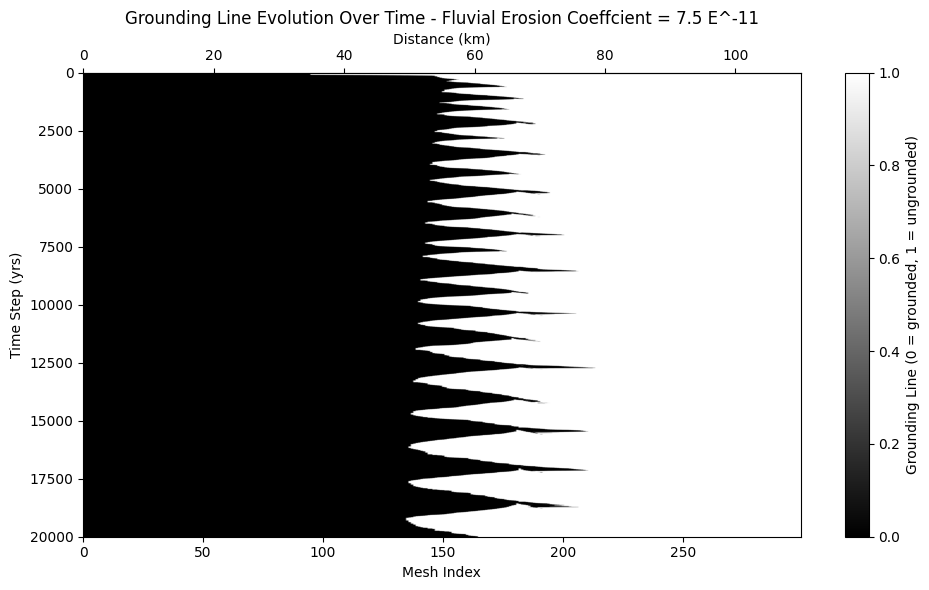

In [195]:
GL_dict = DATA_dict_cc_75e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_75e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [196]:
gl_positions_cc_75e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_75e11.append(idx)

gl_positions_cc_75e11 = np.array(gl_positions_cc_75e11)
GL_km_cc_75e11 = mesh_index_to_km(gl_positions_cc_75e11)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cc_75e11 = GL_km_cc_75e11[mask]

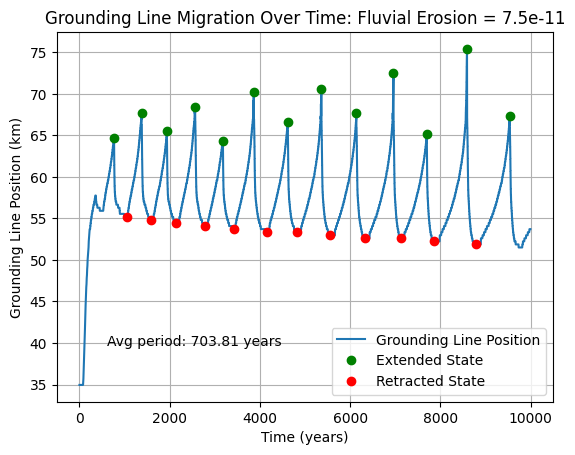

Mean cycle period: 703.81 years
[550.98524834 549.3503161  644.0241263  630.949224   745.91090016
 650.04444857 734.63531346 785.5188815  800.71986795 726.14861183
 923.58501557]
Mean advance amplitude: 68.17 km
[64.74916388 67.69230769 65.48494983 68.42809365 64.3812709  70.26755853
 66.58862876 70.63545151 67.69230769 72.47491639 65.11705686 75.4180602
 67.32441472]
Mean retreat amplitude: 53.44 km
[55.18394649 54.81605351 54.44816054 54.08026756 53.71237458 53.34448161
 53.34448161 52.97658863 52.60869565 52.60869565 52.24080268 51.8729097 ]


In [197]:
peaks_cc_75e11, _ = find_peaks(GL_km_cc_75e11, prominence=5) 
troughs_cc_75e11, _ = find_peaks(-GL_km_cc_75e11, prominence=5)     
periods_cc_75e11 = np.diff(np.array(time)[troughs_cc_75e11])
adv_dists_cc_75e11 = GL_km_cc_75e11[peaks_cc_75e11]
ret_dists__cc_75e11 = GL_km_cc_75e11[troughs_cc_75e11]


plt.plot(time, GL_km_cc_75e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_75e11], GL_km_cc_75e11[peaks_cc_75e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_75e11], GL_km_cc_75e11[troughs_cc_75e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_75e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 7.5e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_75e11):.2f} years")
print(periods_cc_75e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_75e11):.2f} km")
print(adv_dists_cc_75e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_75e11):.2f} km")
print(ret_dists__cc_75e11)


23662.87861957


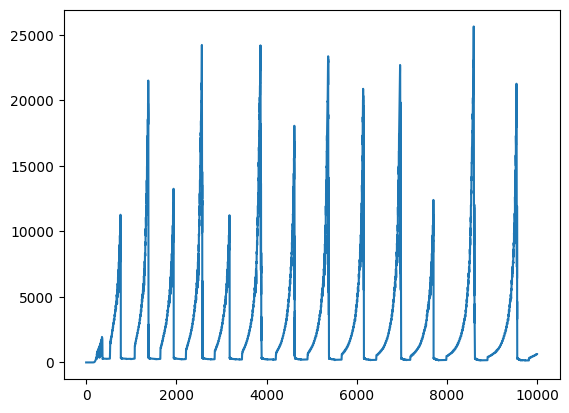

In [198]:
max_Qs_75e11 = np.array([max(values) for values in Qs_dict.values()])
time_75e11 = np.array(list(Qs_dict.keys()))

mask = time_75e11 <= 10000

time_75e11 = time_75e11[mask]
max_Qs_75e11 = max_Qs_75e11[mask]
plt.plot(time_75e11, max_Qs_75e11)
MAX_75e11 = np.max(max_Qs_75e11)

MAX_75e11 = np.max(max_Qs_75e11)
print(MAX_7e11)

In [199]:
## FLUVIAL EROSION ##
title_CC_cycles = str("Number of Cycles Produced: Fluvial Erosion Coefficient")
CCs = np.array([5e-12,1e-11,1.5e-11,2e-11,2.5e-11,3e-11,3.5e-11,4e-11,4.5e-11,5e-11,5.5e-11,6e-11,6.5e-11,7e-11,7.5e-11])
CC_cycles = np.array([0,2,4,5,6,8,9,9,9,10,10,11,11,13,13])
CC_coeff = np.polyfit(CCs,CC_cycles, 1)
p_CC = np.poly1d(CC_coeff)
CC_y_trend = p_CC(CCs)
R_2_CC =r2_score(CC_cycles,p_CC(CCs))


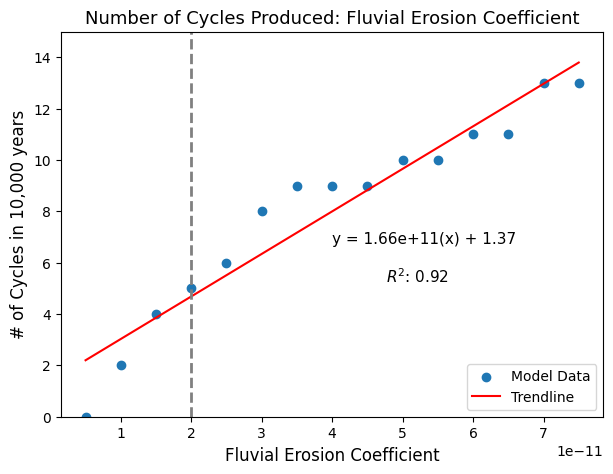

In [200]:
fig, ax1 = plt.subplots(figsize=(7,5))

plt.scatter(CCs, CC_cycles, label = 'Model Data')
plt.title(title_CC_cycles, fontsize = 13)
plt.plot(CCs, CC_y_trend, color='red', label='Trendline')
plt.text(0.6, 0.35, f'$R^2$: {R_2_CC:.2f}', transform=plt.gca().transAxes, fontsize = 11)
plt.text(0.5, 0.45, f'y = {CC_coeff[0]:.2e}(x) + {CC_coeff[1]:.2f}', transform=plt.gca().transAxes, fontsize =11)
plt.axvline(x=2e-11, color='gray', linestyle='--', linewidth=2)
plt.ylim(0,15)
plt.xlabel("Fluvial Erosion Coefficient", fontsize = 12)
plt.ylabel("# of Cycles in 10,000 years", fontsize = 12)
plt.legend()
# plt.xticks(np.arange(0, 2, 0.2)) 

fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/FluvialErosion/#ofCycles_CC.svg", format ="svg", bbox_inches='tight')


### Box and Whisker Plots

Variations in Cycle Period 

In [201]:
CCs = np.array([1.5e-11,2.0e-11,2.5e-11,3.0e-11,3.5e-11,4.0e-11,4.5e-11,5.0e-11,5.5e-11,6.0e-11,6.5e-11,7.0e-11,7.5e-11])

Period_list = [periods_cc_15e11, periods_cc_2e11, periods_cc_25e11, periods_cc_3e11, periods_cc_35e11, periods_cc_4e11, periods_cc_45e11, periods_cc_5e11, periods_cc_55e11, periods_cc_6e11, periods_cc_65e11, periods_cc_7e11, periods_cc_75e11]

medians = np.array([np.median(d) for d in Period_list])
print(CCs)
print(medians)
def exp_decay_fixed(x, a, b, c):
    return a * np.exp(-b * x) + c

c = min(medians)
CCs_scaled = CCs * 1e11  # Scale up the CCs for better numerical stability
p0 = (max(medians) - c, 1.0, c)

# Try fitting again with scaled CCs
popt, pcov = curve_fit(exp_decay_fixed, CCs_scaled, medians, p0=p0)

# Plotting the results
x_fit = np.linspace(min(CCs_scaled), max(CCs_scaled), 500)
y_fit = exp_decay_fixed(x_fit, *popt)


[1.5e-11 2.0e-11 2.5e-11 3.0e-11 3.5e-11 4.0e-11 4.5e-11 5.0e-11 5.5e-11
 6.0e-11 6.5e-11 7.0e-11 7.5e-11]
[2200.5566195  1640.11941389 1358.55852672 1187.52428803 1059.07416358
  968.32842739  930.38853201  857.27437719  849.37194618  741.1605853
  755.13532307  719.04058949  726.14861183]


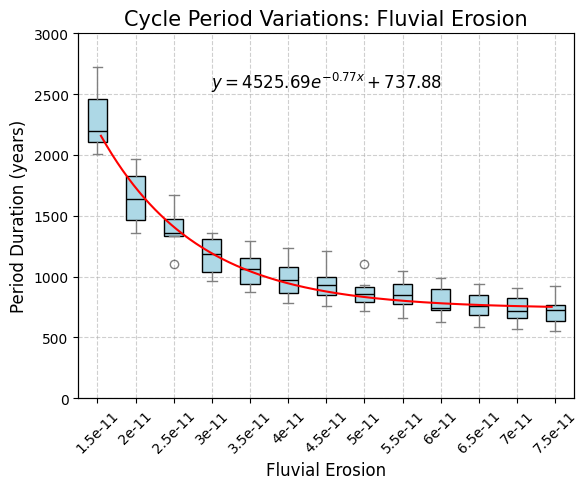

y = 4525.69 e^{-0.77 x} + 737.88


In [202]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(Period_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Cycle Period Variations: Fluvial Erosion", fontsize = 15)
ax.set_ylabel("Period Duration (years)", fontsize = 12)
ax.set_xlabel("Fluvial Erosion", fontsize =12)
# ax.set_xticks(np.arange(1, len(CCs) + 1))
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticklabels(CCs)
ax.set_ylim(0,3000)

ax2 = ax.twiny()
# ax2.plot(np.interp(cfs, cfs, np.arange(1, len(cfs)+1)), medians, 'b.')  # medians as dots
ax2.plot(x_fit / 1e11, y_fit, 'r-', label=f'Fit: $y = {popt[0]:.2f} e^{{-b x}} + {popt[2]:.2f}$')
equation_text = f"$y = {popt[0]:.2f} e^{{-{popt[1]:.2f} x}} + {popt[2]:.2f}$"
ax2.text(0.5, 0.85, equation_text, transform=ax.transAxes, fontsize=12, color='black', ha='center')
ax2.set_xticks([])
ax2.set_xlabel("")
ax2.spines['top'].set_visible(False)

ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/FluvialErosion/Period_Variations_CC.svg", format ="svg", bbox_inches='tight')
print(f"y = {popt[0]:.2f} e^{{-{popt[1]:.2f} x}} + {popt[2]:.2f}")

Variations in GL Extent - Advance 

In [203]:
ExtPos_list = [adv_dists_cc_15e11, adv_dists_cc_2e11, adv_dists_cc_25e11, adv_dists_cc_3e11, adv_dists_cc_35e11, adv_dists_cc_4e11, adv_dists_cc_45e11, adv_dists_cc_5e11, adv_dists_cc_55e11, adv_dists_cc_6e11, adv_dists_cc_65e11, adv_dists_cc_7e11, adv_dists_cc_75e11]


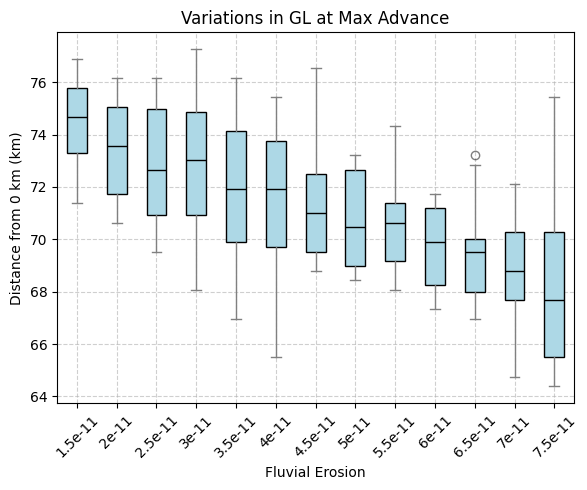

In [204]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(ExtPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in GL at Max Advance")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Fluvial Erosion")
ax.set_xticks(np.arange(1, len(CCs) + 1))
ax.set_xticklabels(CCs)
ax.tick_params(axis='x', labelrotation=45)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Variations in GL Extent - Retreat 

In [205]:
RetPos_list = [ret_dists__cc_15e11, ret_dists__cc_2e11, ret_dists__cc_25e11, ret_dists__cc_3e11, ret_dists__cc_35e11, ret_dists__cc_4e11, ret_dists__cc_45e11, ret_dists__cc_5e11, ret_dists__cc_55e11, ret_dists__cc_6e11, ret_dists__cc_65e11, ret_dists__cc_7e11, ret_dists__cc_75e11]


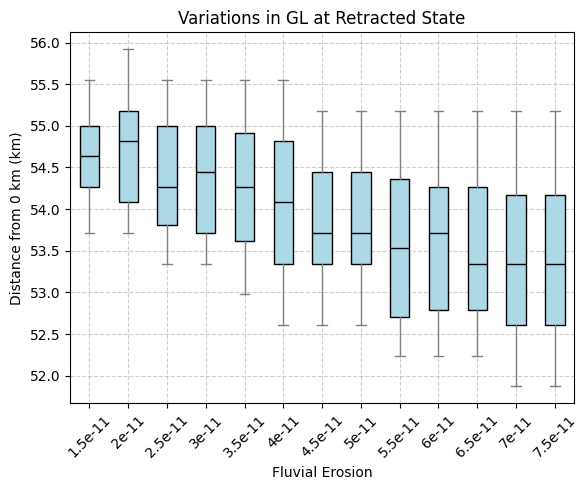

In [206]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(RetPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in GL at Retracted State")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Fluvial Erosion")
ax.set_xticks(np.arange(1, len(CCs) + 1))
ax.set_xticklabels(CCs)
ax.tick_params(axis='x', labelrotation=45)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

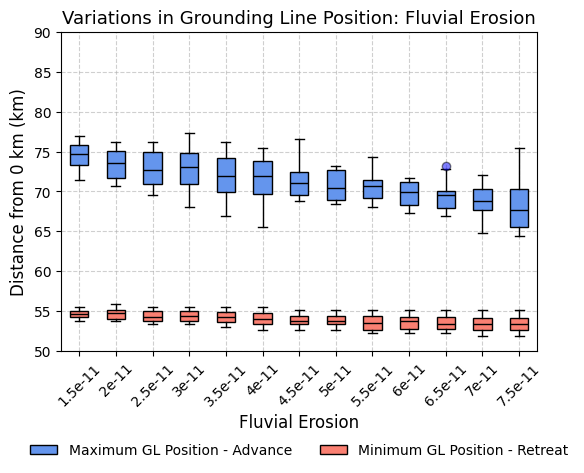

In [207]:
fig, ax = plt.subplots(figsize=(6, 5))

D2 = ax.boxplot(RetPos_list, patch_artist=True,
           boxprops=dict(facecolor='salmon'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='red', alpha=0.5))

D1 = ax.boxplot(ExtPos_list, patch_artist=True,
           boxprops=dict(facecolor='cornflowerblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='blue', alpha=0.5))

ax.set_title("Variations in Grounding Line Position: Fluvial Erosion", fontsize = 13)
ax.set_ylabel("Distance from 0 km (km)", fontsize = 12)
ax.set_xlabel("Fluvial Erosion", fontsize = 12)
ax.legend([D1["boxes"][0], D2["boxes"][0]], ['Maximum GL Position - Advance', 'Minimum GL Position - Retreat'], loc='upper center', bbox_to_anchor=(0.5, -0.25),
          ncol=2, frameon=False)
ax.set_xticks(np.arange(1, len(CCs) + 1))
ax.set_xticklabels(CCs)
ax.tick_params(axis='x', labelrotation=45)
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_ylim(50,90)
plt.tight_layout()
plt.show()
fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/FluvialErosion/GL_Variations_CC.svg", format ="svg", bbox_inches='tight')


In [208]:
# surf_vels = [us_dict_5e12, us_dict_1e11, us_dict_15e11, us_dict_2e11, us_dict_25e11, us_dict_3e11, us_dict_35e11, us_dict_4e11, us_dict_45e11, us_dict_5e11, us_dict_55e11,us_dict_6e11, us_dict_65e11, us_dict_7e11, us_dict_75e11]
surf_vels = [us_dict_2e11, us_dict_3e11, us_dict_4e11, us_dict_5e11,us_dict_6e11, us_dict_7e11]

In [209]:
import matplotlib.colors as mcolors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{minval:.2f},{maxval:.2f})',
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

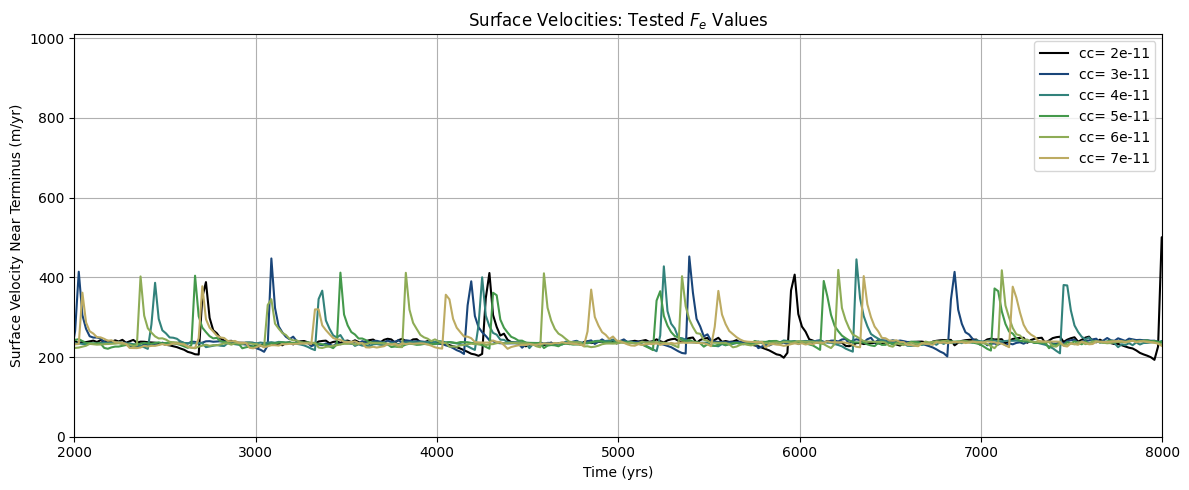

In [210]:
from scipy.interpolate import interp1d

CCs = np.array([2e-11 ,3.0e-11,4.0e-11,5.0e-11,6.0e-11,7.0e-11])
common_times = np.linspace(0, 10000, 500)
cmap = plt.colormaps['gist_earth']
# cmap = truncate_colormap(cmap, 0.25, 1.0)
cmap = truncate_colormap(cmap, 0.0, 0.75)
colors = cmap(np.linspace(0, 1, len(surf_vels)))

fig, ax = plt.subplots(figsize=(12,5))

for i, us_dict in enumerate(surf_vels):
    term_surface_velocity = []
    times = []

    for t in sorted(us_dict.keys()):
        us_ = us_dict[t]
        notNAN = np.where(np.isfinite(us_))[0]

        if len(notNAN) > 0:
            terminus = notNAN[-1]
        else:
            terminus = None

        if terminus is not None and terminus >= 50:
            term_usvel = us_[terminus - 50]
        else:
            term_usvel = 0

        if np.isnan(term_usvel):
            term_usvel = 0

        term_surface_velocity.append(term_usvel)
        times.append(t)

    times = np.array(times)
    term_surface_velocity = np.array(term_surface_velocity)

    # Sort for interpolation
    sorted_indices = np.argsort(times)
    times = times[sorted_indices]
    term_surface_velocity = term_surface_velocity[sorted_indices]

    # Interpolate to common time grid
    interp_func = interp1d(times, term_surface_velocity, bounds_error=False, fill_value="extrapolate")
    interp_speeds = interp_func(common_times)

    plt.plot(common_times, interp_speeds, label=f'cc= {CCs[i]}', color=colors[i])

plt.xlabel('Time (yrs)')
plt.ylabel('Surface Velocity Near Terminus (m/yr)')
plt.legend()
plt.xlim(2000,8000)
plt.ylim(0,1010)

plt.title('Surface Velocities: Tested $F_{e}$ Values')
plt.grid(True)
plt.tight_layout()
plt.show()
fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/FluvialErosion/Vel_cc.svg", format ="svg", bbox_inches='tight')

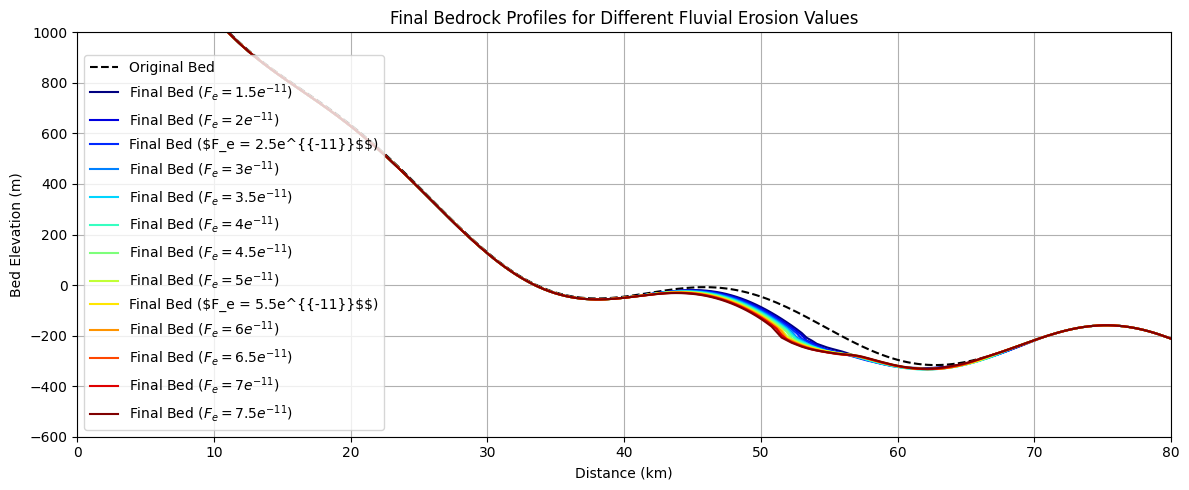

In [211]:
CCs = np.array([1.5e-11,2.0e-11,2.5e-11,3.0e-11,3.5e-11,4.0e-11,4.5e-11,5.0e-11,5.5e-11,6.0e-11,6.5e-11,7.0e-11,7.5e-11])
num_points = len(next(iter(bed_dict15e11.values())))
x_km = mesh_index_to_km(np.arange(num_points))

# Grab original bed (assuming t=0 in all dicts)
original_bed = bed_dict15e11[0]

# Create figure
fig, ax = plt.subplots(figsize=(12, 5))

# Plot original bed
plt.plot(x_km, original_bed, 'k--', label='Original Bed')

# List of erosion cases to loop through
bed_dicts = [bed_dict15e11, bed_dict2e11, bed_dict25e11, bed_dict3e11, bed_dict35e11, bed_dict4e11, bed_dict45e11, bed_dict5e11, bed_dict55e11, bed_dict6e11, bed_dict65e11, bed_dict7e11, bed_dict75e11]
labels = ['$F_e = 1.5e^{{-11}}$','$F_e = 2e^{{-11}}$', '$F_e = 2.5e^{{-11}}$$', '$F_e = 3e^{{-11}}$', '$F_e = 3.5e^{{-11}}$', '$F_e = 4e^{{-11}}$', '$F_e = 4.5e^{{-11}}$', '$F_e = 5e^{{-11}}$', '$F_e = 5.5e^{{-11}}$$', '$F_e = 6e^{{-11}}$','$F_e = 6.5e^{{-11}}$', '$F_e = 7e^{{-11}}$', '$F_e = 7.5e^{{-11}}$']
common_times = np.linspace(0, 10000, 500)
colors = plt.cm.jet(np.linspace(0, 1, len(bed_dicts)))

for bed_dict, label, color in zip(bed_dicts, labels, colors):
    valid_times = [t for t in bed_dict.keys() if t <= 10000]

    if len(valid_times) == 0:
        continue  # skip if no times <= 10000

    final_time = max(valid_times)
    final_bed = bed_dict[final_time]    
    plt.plot(x_km, final_bed, color=color, label=f'Final Bed ({label})')

plt.xlabel("Distance (km)")
plt.ylabel("Bed Elevation (m)")
plt.title("Final Bedrock Profiles for Different Fluvial Erosion Values")
plt.xlim(0,80)
plt.ylim(-600,1000)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/FluvialErosion/BedrockErosion_cc.svg", format ="svg", bbox_inches='tight')

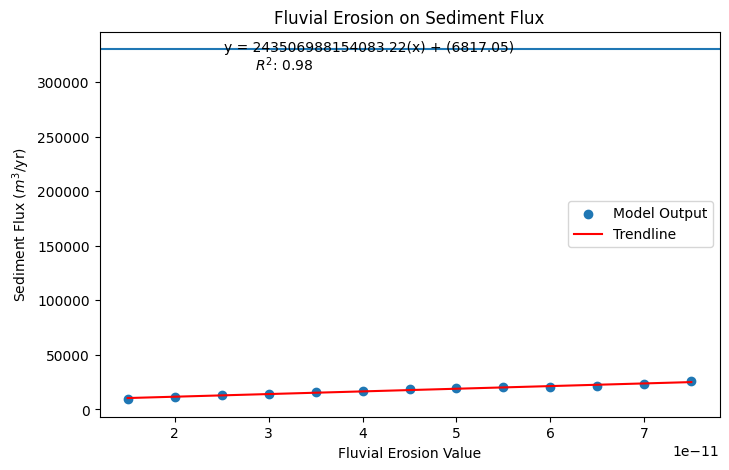

In [213]:
CCs = np.array([1.5e-11,2.0e-11,2.5e-11,3.0e-11,3.5e-11,4.0e-11,4.5e-11,5.0e-11,5.5e-11,6.0e-11,6.5e-11,7.0e-11,7.5e-11])
maxs_Qs = np.array([MAX_15e11, MAX_2e11, MAX_25e11, MAX_3e11, MAX_35e11, MAX_4e11, MAX_45e11, MAX_5e11, MAX_55e11, MAX_6e11, MAX_65e11, MAX_7e11, MAX_75e11])
CF_coeff = np.polyfit(CCs,maxs_Qs, 1)
p_CF = np.poly1d(CF_coeff)
CF_y_trend = p_CF(CCs)
R_2_CF =r2_score(maxs_Qs,p_CF(CCs))

fig, ax = plt.subplots(figsize=(8, 5))

plt.scatter(CCs, maxs_Qs, label = 'Model Output')
plt.plot(CCs, CF_y_trend, color='red', label='Trendline')
plt.axhline(y=3.3e5)
plt.text(0.25, 0.9, f'$R^2$: {R_2_CF:.2f}', transform=plt.gca().transAxes)
plt.text(0.2, 0.95, f'y = {CF_coeff[0]:.2f}(x) + ({CF_coeff[1]:.2f})', transform=plt.gca().transAxes)
plt.xlabel("Fluvial Erosion Value")
plt.ylabel("Sediment Flux ($m^{3}$/yr)")
plt.title("Fluvial Erosion on Sediment Flux")
plt.legend()
plt.show()
# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/ClimateFactor/Relationship_Plots/CF_vs_Qs.svg", format="svg", bbox_inches='tight')
